# **Project Transport - part 2 - Feature Analysis, Missing values, EDA**

 <a id=problem></a>
## 1.0 **Problem Statement**
***
1. Analysis of travel research data in Israel
2. Create a machine learning model to predict the number of passengers in Israel.


##### The dataset is based on 2019 weekday travel data in Israel.
- There are a total of 1,270 zones in Israel. One municipality may have several zones.
- There are hourly travel data from each zone to each zone.
- Statistics for each zone have been added to the main dataset, such as geodata fot zones,
- number of residents, average age, religious residents, arab residents, number of workers, etc.
- In total, the complete data set contains 1,521,699 rows × 30 columns.
- All data is published on the state website: https://info.data.gov.il/ .
- <b>The main goal of the work is to create a model to predict the number of trips from a certain zone in Israel to each other zone in accordance with the data of the corresponding zones.</b>

 <a id = Data_Exploration></a>
## 2.0 **Data Exploration**
---

 <a id = Libraries></a>
### 2.1 **Libraries**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


### 2.2 **Import data from part 1**
Import data from part 1

In [ ]:
# Loading the pkl file from google.disk to google.colab

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/'
# path = '.'

Mounted at /content/drive


In [ ]:
# Loading the pkl file to Geoframe

merged_df = pd.read_pickle(path + "/Data/merged_GushDan_df.pkl")


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222570 entries, 18 to 1506474
Data columns (total 67 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   fromZone                222570 non-null  int64   
 1   ToZone                  222570 non-null  int64   
 2   h0                      222570 non-null  float64 
 3   h1                      222570 non-null  float64 
 4   h2                      222570 non-null  float64 
 5   h3                      222570 non-null  float64 
 6   h4                      222570 non-null  float64 
 7   h5                      222570 non-null  float64 
 8   h6                      222570 non-null  float64 
 9   h7                      222570 non-null  float64 
 10  h8                      222570 non-null  float64 
 11  h9                      222570 non-null  float64 
 12  h10                     222570 non-null  float64 
 13  h11                     222570 non-null  float64 
 14  h12    

In [ ]:
# Due to the fact that the data in the dataset merged_df shows only 99% of trips, we will increase the number of passengers by 1 times,

# # Сreating a new dataset trip_df with complete trip data
trip_df = merged_df.copy()


 <a id = Descriptions_fields></a>
### 2.3 **Descriptions of Data fields**

In [ ]:
# fromZone - unique identifier of the zone from which the trip began ( Zone - A )
# ToZone - unique identifier of the zone in which the trip ended ( Zone - B )
# h0 - h23  - 24 fields. Number of passengers traveling at the corresponding hour (h0 = 0:00-0:59, h1 = 1:00-1:59 ...) from zone A to zone B
# Distance_A-B - Geographical distance between zones A and B in meters.
# Dist_Category_A_B - Categorical field. Geographical distance between zones A and B in meters.
# Morning_rush_6_9 - number of passengers traveling during the morning rush hour (from 6:00 to 9:00) from zone A to zone B
# Evening_rush_15_18- number of passengers traveling during the evening rush hour (from 15:00 to 10:00) from zone A to zone B
# TAZ_1270_A - unique identifier of the zone from which the trip began ( Same as the field -  fromZone )
# LRT_Distance_A - geographical distance between zone A and the nearest train LRT station in meters.
# BRT_Distance_A - geographical distance between zone A and the nearest  BRT station in meters.
# TMA_Distance_A - geographical distance between zone A and the nearest heavy passenger transport lines in meters.
# MotoRate_A - level of vehicles data - MotoRate (number of vehicles per 1000 people) for zone A
# Density_jobs3_A - Density of jobs in zone A
# Industrial_Distance_A - Distance from zone A to the nearest industrial zone in meters. If zone A borders an industrial zone, then the distance between the zones is 0.
# Municipality_A - Name of the municipality in which zone A is located (from which the passenger is departing).
# Population_A - Number of inhabitants in zone A.
# Average_age_A - The mean age of residents of zone A.
# Median_age_A - The median age of residents of zone A.
# Level_ultra-Orthodox_A - Level of ultra-Orthodox Jewish population in area A. Where level equal to 1 is the largest level of ultra-Orthodox Jewish population, level equal to 4 there is a relatively small number of ultra-Orthodox residents.
# Arab_population_A - Number of Arab residents living in zone A.
# Workers_A - Number of workers living in the zone.
# Area_m2_A - Area of zone A in square meters
# Socio_Economic_Index_A - Socio-economic index of zone A, where 1 is the lowest level and 10 is the highest socio-economic level.
# X_A  - longitude of the central point of zone A in which the trip began.
# Y_A - latitude of the central point of zone A in which the trip began.
# TAZ_1270_B - unique identifier of the zone in which the trip ended ( Same as the field -  ToZone )
# LRT_Distance_B
# BRT_Distance_B
# TMA_Distance_B
# MotoRate_B
# Density_jobs3_B
# Industrial_Distance_B
# Municipality_B
# Population_B
# Average_age_B
# Level_ultra-Orthodox_B
# Arab_population_B
# Workers_B
# Area_m2_B
# Socio_Economic_Index_B
# Pop_Density_Sqkm_B
# X_B — longitude of the central point of zone B where the trip ended.
# Y_B — latitude of the central point of zone B, where the trip ended.


In [ ]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222570 entries, 18 to 1506474
Data columns (total 67 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   fromZone                222570 non-null  int64   
 1   ToZone                  222570 non-null  int64   
 2   h0                      222570 non-null  float64 
 3   h1                      222570 non-null  float64 
 4   h2                      222570 non-null  float64 
 5   h3                      222570 non-null  float64 
 6   h4                      222570 non-null  float64 
 7   h5                      222570 non-null  float64 
 8   h6                      222570 non-null  float64 
 9   h7                      222570 non-null  float64 
 10  h8                      222570 non-null  float64 
 11  h9                      222570 non-null  float64 
 12  h10                     222570 non-null  float64 
 13  h11                     222570 non-null  float64 
 14  h12    

### 2.4 **Target, Feature and Data Analysis & Filling missing data**

This section represent the analysis of the data

 <a id=2_4_1></a>
#### 2.4.1 **Traveling during rush hours : Morning_rush_6_9 vs Evening_rush_15_18**

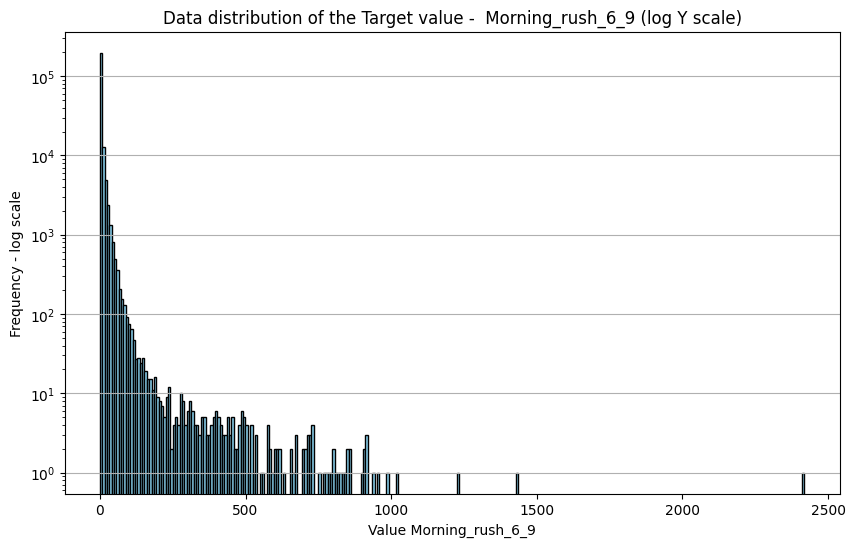

In [ ]:
# Morning_rush_6_9 - The target data we will consider in our model.
# They explain to us how many people travel in the morning (from 6:00 to 9:00) from each zone (zone A) to any other zone (zone B)
# Let's look at how data is distributed

num_intervals = 300
trip_df['interval'] = pd.cut(trip_df['Morning_rush_6_9'], bins=num_intervals)



plt.figure(figsize=(10, 6))
plt.hist(trip_df['Morning_rush_6_9'], bins=num_intervals, color='skyblue', edgecolor='black')
plt.xlabel('Value Morning_rush_6_9')
plt.ylabel('Frequency - log scale')
plt.title('Data distribution of the Target value -  Morning_rush_6_9 (log Y scale)')
plt.yscale('log') # Add a logarithmic scale to the Y axis
plt.grid(axis='y')


plt.show()


In [ ]:
df_Morning_interval = trip_df.groupby(['interval'], as_index=False)['Morning_rush_6_9'].count()
df_Morning_interval.head(25)


,interval,Morning_rush_6_9
0,"(-2.418, 8.062]",198263
1,"(8.062, 16.123]",12848
2,"(16.123, 24.185]",4872
3,"(24.185, 32.247]",2383
4,"(32.247, 40.308]",1317
5,"(40.308, 48.37]",806
6,"(48.37, 56.431]",500
7,"(56.431, 64.493]",358
8,"(64.493, 72.555]",207
9,"(72.555, 80.616]",154


In [ ]:
# # Distribution of passengers during peak hours by municipality

# # Data grouping and summarization
# df_municipal_sum = trip_df.groupby(['Municipality_A'], as_index=False)['Morning_rush_6_9', 'Evening_rush_15_18'].sum()

# # Sort by number of passengers from largest to smallest
# df_municipal_sum_sorted = df_municipal_sum.sort_values(by='Morning_rush_6_9', ascending=False)


In [ ]:
# Import file data - statistics for zones,
# source of data: https://data.gov.il/dataset/tripscelular_1819

file_name = path + '/Data/celular1819_v1.3/celular1819_statistical_data_v01_utf-8.csv'
statistical_data_zones = pd.read_csv(file_name, encoding='cp1252')

# From the dataset we will take only 8 necessary columns and only rows with data (1270 rows)
stat_data_zones = statistical_data_zones.iloc[:1270, [0, 10, 22, 57, 59, 60, 79, 81, 83]]
stat_data_zones.columns = ['Area_1270', 'Municipality', 'Population', 'Average_age','Level_ultra-Orthodox','Arab_population','Workers','Area_m2','Socio_Economic_Index']

stat_data_zones['Population'] = stat_data_zones['Population'].str.replace(',', '').astype(float)
stat_data_zones['Area_m2'] = stat_data_zones['Area_m2'].str.replace(',', '').astype(float)
stat_data_zones['Arab_population'] = stat_data_zones['Arab_population'].str.replace(',', '').astype(float)
stat_data_zones['Workers'] = stat_data_zones['Workers'].str.replace(',', '').astype(float)

stat_data_zones

stat_data_zones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area_1270             1270 non-null   int64  
 1   Municipality          1270 non-null   object 
 2   Population            1180 non-null   float64
 3   Average_age           989 non-null    float64
 4   Level_ultra-Orthodox  128 non-null    float64
 5   Arab_population       292 non-null    float64
 6   Workers               1242 non-null   float64
 7   Area_m2               1270 non-null   float64
 8   Socio_Economic_Index  941 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 89.4+ KB


In [ ]:
# calculation of statistical data for each municipality.

stat_municipal = stat_data_zones.groupby(['Municipality'] , as_index=False).agg({'Population':'sum', 'Arab_population':'sum','Workers':'sum', 'Area_m2':'sum', 'Level_ultra-Orthodox':'mean', 'Socio_Economic_Index':'mean' })


stat_municipal[stat_municipal['Municipality']=='Petah Tikva']

,Municipality,Population,Arab_population,Workers,Area_m2,Level_ultra-Orthodox,Socio_Economic_Index
215,Petah Tikva,247909.0,0.0,120679.0,35806139.0,3.6,7.0


In [ ]:
# # Combining 2 dataframes: population statistics (stat_municipal) and travel data (df_municipal_sum_sorted) for each municipality
# df_municipal = pd.merge(df_municipal_sum_sorted, stat_municipal, left_on='Municipality_A', right_on='Municipality')
# df_municipal.drop(['Municipality'], axis=1, inplace=True)

# # calculation of the percentage of travelers out of all residents of the municipality
# df_municipal['Evening_share_travelers'] = df_municipal['Evening_rush_15_18']/df_municipal['Population']
# df_municipal['Morning_share_travelers'] = df_municipal['Morning_rush_6_9']/df_municipal['Population']

In [ ]:
# # Visualize Distribution of passengers during peak hours by municipality
# # Chart of the number of passengers during peak hours in the 20 largest cities

# df_municipal_20_largest = df_municipal.head(20)
# municipals = df_municipal_20_largest['Municipality_A']
# morning_passengers = df_municipal_20_largest['Morning_rush_6_9']
# evening_passengers = df_municipal_20_largest['Evening_rush_15_18']

# plt.figure(figsize=(10, 6))
# xpos = np.arange(len(municipals))

# plt.bar(xpos-0.2, morning_passengers, width=0.4, label='Morning rush 6_9', color='skyblue')
# plt.bar(xpos+0.2, evening_passengers, width=0.4, label='Evening rush 15_18', color='salmon', alpha=0.7)

# plt.ylabel('Number of passengers')
# plt.title('Number of passengers during peak hours in 20 cities')
# plt.xticks(rotation=90)

# plt.legend()
# plt.xticks(xpos, municipals)
# plt.grid(axis='y', linestyle='--')


# # Set  font size for all elements of the plot
# plt.rc('font', size=10) # Default text size
# plt.rc('axes', titlesize=15) # Title size
# plt.rc('axes', labelsize=10) # Size of x and y axis labels
# plt.rc('xtick', labelsize=10) # Size of tick marks on x-axis
# plt.rc('ytick', labelsize=10) # Size of tick marks along the y axis
# plt.rc('legend', fontsize=10) # Legend font size


In [ ]:
# # Chart of the percentage of travelers out of all residents in the 10 largest municipality

# df_municipal_50_largest = df_municipal.head(50)
# municipals = df_municipal_50_largest['Municipality_A']
# share_morning_passengers = df_municipal_50_largest['Morning_share_travelers']
# share_evening_passengers = df_municipal_50_largest['Evening_share_travelers']


# plt.figure(figsize=(20, 10))
# xpos = np.arange(len(municipals))


# plt.bar(xpos-0.2, share_morning_passengers, width=0.4, label='Morning rush 6-9', color='skyblue')
# plt.bar(xpos+0.2, share_evening_passengers, width=0.4, label='Evening rush 15-18', color='salmon', alpha=0.7)


# # plt.xlabel('Сities')
# plt.ylabel('Share of passengers')
# plt.title('Share of passengers during peak hours in 50 cities')
# plt.xticks(rotation=90)


# plt.legend()
# plt.xticks(xpos, municipals)
# plt.grid(axis='y', linestyle='--')


# # Set  font size for all elements of the plot
# plt.rc('font', size=10) # Default text size
# plt.rc('axes', titlesize=15) # Title size
# plt.rc('axes', labelsize=10) # Size of x and y axis labels
# plt.rc('xtick', labelsize=10) # Size of tick marks on x-axis
# plt.rc('ytick', labelsize=10) # Size of tick marks along the y axis
# plt.rc('legend', fontsize=10) # Legend font size




In [ ]:
# # Visualize Distribution of passengers during peak hours by municipality
# # Chart of the number of passengers during peak hours in the 50 largest cities

# _df = pd.DataFrame({
#     'Morning rush 6-9': df_municipal_50_largest['Morning_share_travelers'],
#     'Evening rush 15-18': df_municipal_50_largest['Evening_share_travelers']
# })

# _df.plot(kind='box', vert=False, fontsize=15)
# plt.xlabel('Share of passengers from the total population')
# plt.title('Share of passengers during peak hours')
# plt.grid(True)
# plt.show()



#### **Brief conclusion from the analysis:** - 2.4.1 Morning_rush_6_9

 1. Morning_rush_6_9 data is exponentially distributed. For example, in the smallest interval (0-47 passengers who travel from one zone to another zone) there are 295000 rows, in the interval (190-236 passengers who travel from one zone to another zone) there are 530 rows, and in the interval 992 -1039 passengers only  14 rows/
 2. In many cities, the number of travelers in the morning and evening is very similar, but on average, the share of passengers among all city residents differs in the morning and in the evening.
 3. In some cities, such as Tel Aviv, the number of people leaving in the evening is much greater than those arriving in the morning.
 4. As a percentage of the total population in the city, 25-32% leave during the morning rush hour. 28-41% leave during the evening rush hour.
 5. There are several regions in which more than 50% of the population leaves during the morning rush hour.
 6. There are relatively many cities in which more than 50% of the population leaves during the evening rush hour. There is even a region where almost 100% of the population travels in the evening.


 <a id=2_4_2></a>
#### 2.4.2 **Analysis of intercity and domestic trips: Morning_rush_6_9  vs Distance_A_B**

In [ ]:
# Create auxiliary datasets to separate trips within the municipality (df_within) and those leaving the municipality (df_from)

df_within = trip_df[merged_df['Municipality_A'] == trip_df['Municipality_B']]
df_from = trip_df[merged_df['Municipality_A'] != trip_df['Municipality_B']]


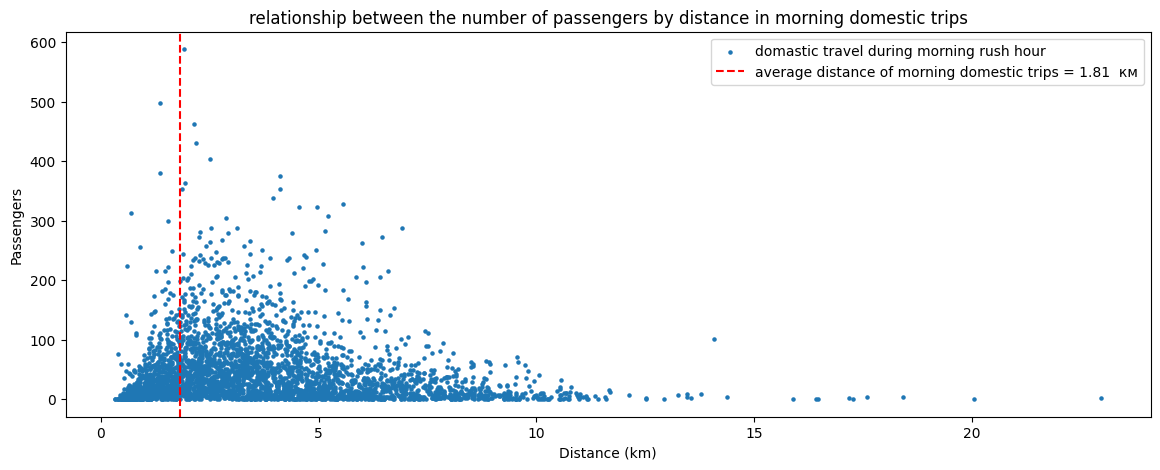

In [ ]:
domestic_trips = df_within[df_within['Distance_A_B']>0].groupby(['Distance_A_B'], as_index=False).agg({'Morning_rush_6_9':'sum'})

average_line_within = (np.dot(df_within['Distance_A_B'], df_within['Morning_rush_6_9'])/df_within['Morning_rush_6_9'].sum())/1000
avg_legend = f"average distance of morning domestic trips = {average_line_within:.2f}  км"
plt.figure(figsize = (14,5))

plt.scatter(domestic_trips['Distance_A_B']/1000, domestic_trips['Morning_rush_6_9'], s=5, alpha=1)
plt.axvline(x=average_line_within, color='red', linestyle='--')
plt.legend(["domastic travel during morning rush hour", avg_legend ])
plt.ylabel('Passengers')
plt.xlabel('Distance (km)')
plt.title('relationship between the number of passengers by distance in morning domestic trips')
plt.show()

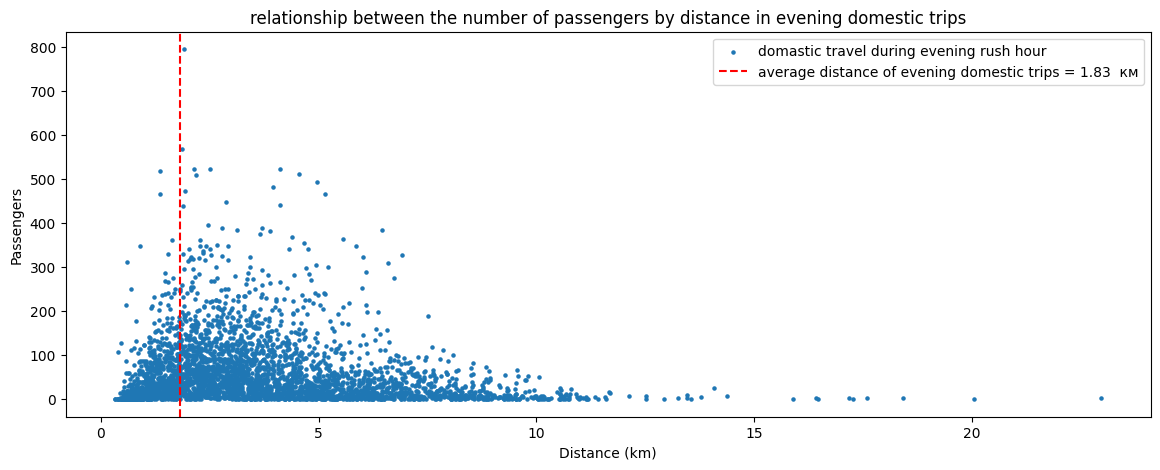

In [ ]:
domestic_trips = df_within[df_within['Distance_A_B']>0].groupby(['Distance_A_B'], as_index=False).agg({'Evening_rush_15_18':'sum'})

average_line_within = (np.dot(df_within['Distance_A_B'], df_within['Evening_rush_15_18'])/df_within['Evening_rush_15_18'].sum())/1000
avg_legend = f"average distance of evening domestic trips = {average_line_within:.2f}  км"
plt.figure(figsize = (14,5))

plt.scatter(domestic_trips['Distance_A_B']/1000, domestic_trips['Evening_rush_15_18'], s=5, alpha=1)
plt.axvline(x=average_line_within, color='red', linestyle='--')
plt.legend(["domastic travel during evening rush hour", avg_legend ])
plt.ylabel('Passengers')
plt.xlabel('Distance (km)')
plt.title('relationship between the number of passengers by distance in evening domestic trips')
plt.show()

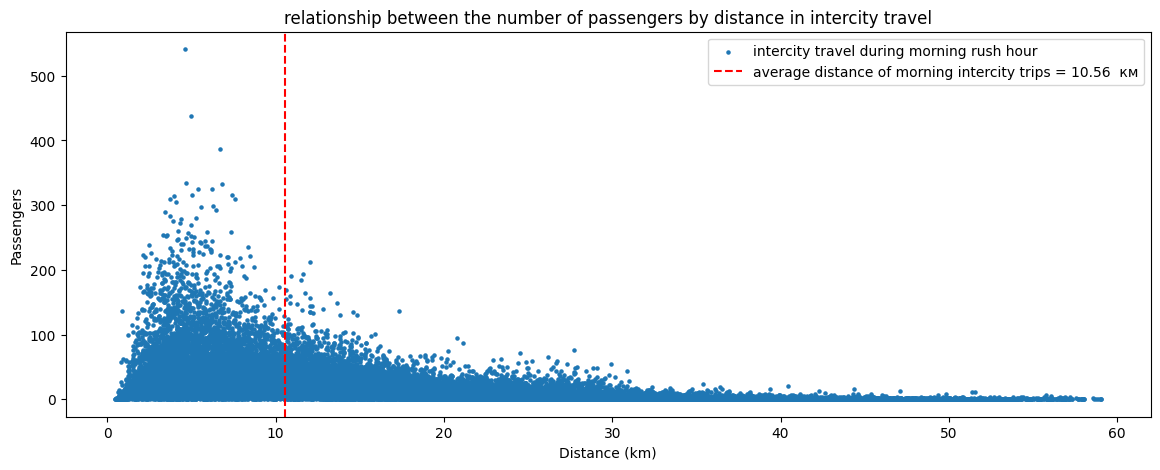

In [ ]:
# Graph of relationship between the number of passengers by distance in intercity travel during morning rush hour

intercity_trips = df_from[df_from['Distance_A_B']>0].groupby(['Distance_A_B'], as_index=False).agg({'Evening_rush_15_18':'sum', 'Morning_rush_6_9':'sum' })

average_line_from = (np.dot(df_from['Distance_A_B'], df_from['Morning_rush_6_9'])/df_from['Morning_rush_6_9'].sum())/1000

plt.figure(figsize = (14,5))

plt.scatter(intercity_trips['Distance_A_B']/1000, intercity_trips['Morning_rush_6_9'], s=5, alpha=1)
plt.axvline(x=average_line_from, color='red', linestyle='--')
avg_legend = f"average distance of morning intercity trips = {average_line_from:.2f}  км"
plt.legend(["intercity travel during morning rush hour", avg_legend ])
plt.ylabel('Passengers')
plt.xlabel('Distance (km)')
plt.title('relationship between the number of passengers by distance in intercity travel')
plt.show()

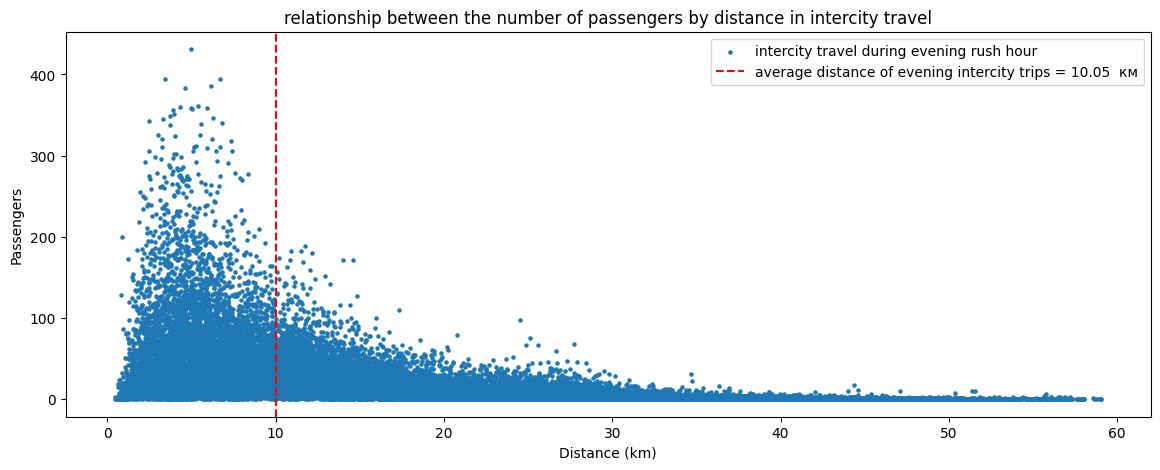

In [ ]:
# Graph of relationship between the number of passengers by distance in intercity travel during evening rush hour

average_line_from = (np.dot(df_from['Distance_A_B'], df_from['Evening_rush_15_18'])/df_from['Evening_rush_15_18'].sum())/1000

plt.figure(figsize = (14,5))

plt.scatter(intercity_trips['Distance_A_B']/1000, intercity_trips['Evening_rush_15_18'], s=5, alpha=1)
plt.axvline(x=average_line_from, color='red', linestyle='--')
avg_legend = f"average distance of evening intercity trips = {average_line_from:.2f}  км"
plt.legend(["intercity travel during evening rush hour", avg_legend ])
plt.ylabel('Passengers')
plt.xlabel('Distance (km)')
plt.title('relationship between the number of passengers by distance in intercity travel')
plt.show()

#### **Brief conclusion from the analysis:**
 1. The average distance of domestic travel in Israel in the morning and evening hours is almost the same: 2.5 – 2.7 km.
 2. The average distance of intercity travel in Israel in the morning and evening hours is almost the same: 20.1 – 20.5 km.

<a id=2_4_3></a>
#### 2.4.3 **Analysis of distribution of the number of passengers during peak hours depending on the travel distance: Dist_Category_A_B**

In [ ]:
# Сreating a category for the distances between zones A and B

trip_df['Dist_Category_A_B'] = pd.cut(x=trip_df['Distance_A_B']/1000, bins=[-1, 5, 10, 20, 35, 55,  85, 125,  500],
                                                                        labels=[
                                                                                '0-5',    #+5
                                                                                '5-10',    #+5
                                                                                '10-20',   #+10
                                                                                '20-35',   #+15
                                                                                '35-55',   #+20
                                                                                '55-85',   #+30
                                                                                '85-125',  #+40
                                                                                '125-450', #+80
                                                                                ])
# Сreating a category for the distances between zones A and B

df_from['Dist_Category_A_B'] = pd.cut(x=df_from['Distance_A_B']/1000, bins=[-1, 5, 10, 20, 35, 55,  85, 125,  500],
                                                                        labels=[
                                                                                '0-5',    #+5
                                                                                '5-10',    #+5
                                                                                '10-20',   #+10
                                                                                '20-35',   #+15
                                                                                '35-55',   #+20
                                                                                '55-85',   #+30
                                                                                '85-125',  #+40
                                                                                '125-450', #+80
                                                                                ])

# Сreating a category for the distances between zones A and B

df_within['Dist_Category_A_B'] = pd.cut(x=df_within['Distance_A_B']/1000, bins=[-1, 5, 10, 20, 35, 55,  85, 125,  500],
                                                                        labels=[
                                                                                '0-5',    #+5
                                                                                '5-10',    #+5
                                                                                '10-20',   #+10
                                                                                '20-35',   #+15
                                                                                '35-55',   #+20
                                                                                '55-85',   #+30
                                                                                '85-125',  #+40
                                                                                '125-450', #+80
                                                                                ])


<ipython-input-23-9d32233da114>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_from['Dist_Category_A_B'] = pd.cut(x=df_from['Distance_A_B']/1000, bins=[-1, 5, 10, 20, 35, 55,  85, 125,  500],
<ipython-input-23-9d32233da114>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_within['Dist_Category_A_B'] = pd.cut(x=df_within['Distance_A_B']/1000, bins=[-1, 5, 10, 20, 35, 55,  85, 125,  500],


#### **Brief conclusion from the analysis 2.4.3:**
1. Approximately the same number of people travel intercity in **Petah-Tikva** city in the morning and in the evening. Most intercity trips are between 5 and 10 km.
2. In **Jerusalem**, there are very few intercity trips in the morning and evening - 6 times less than domestic trips.
3. In **Jerusalem**, On intercity trips there is no clear distribution between distances - in equal proportions, passengers travel distances from 5 to 55 km.
4. In the city of **Tel Aviv**, there is a very significant difference in intercity travel. In the evening, passengers leave Tel Aviv 2.5 times more than in the morning. This indicates a large number of jobs; in the evening, workers return home at a distance of 5 to 20 km.
5. 50% more people leave the city of **Rishon LeZion** in the morning than leave it in the evening. This suggests that many city residents work in other cities located at a distance of 5-20 km


<a id=2_4_4></a>
#### 2.4.4 **Analysis of hourly trips: h0, h1.....h23**

##### 2.4.4.1 **Total trips Per Hour**
Studying the distribution of trips on a 24-hour scale.

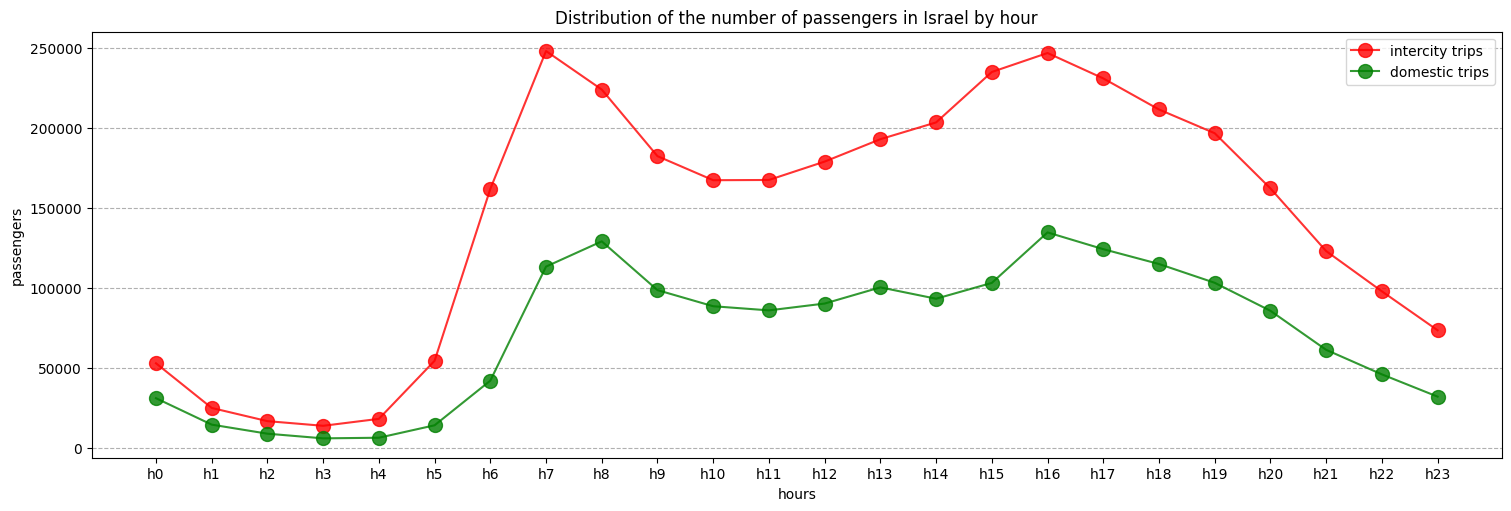

In [ ]:
# Distribution of the number of passengers in Israel by hour - domestic and intercity trips
df_from.iloc[:, 2:26].sum()
df_within.iloc[:, 2:26].sum()
fig, axs = plt.subplots(  1, layout='constrained', figsize =(15,5))



axs.plot( df_from.iloc[:, 2:26].sum(), color ='red', marker='o', markersize=10, alpha=0.8)
axs.plot( df_within.iloc[:, 2:26].sum(), color ='green', marker='o', markersize=10, alpha=0.8)

axs.grid(axis='y', linestyle='--')
axs.set_xlabel('hours')
axs.set_ylabel('passengers')
axs.legend(['intercity trips', 'domestic trips'])
axs.set_title('Distribution of the number of passengers in Israel by hour')

plt.show()

###### Let's look at the distribution of the number of trips on a 24-hour scale.

In [ ]:
def clock(ax, radii, title, color):
    N = 24
    bottom = 2

    # create theta for 24 hours
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)


    # width of each bin on the plot
    width = (2*np.pi) / N

    bars = ax.bar(theta, radii, width=width, bottom=bottom, color=color, edgecolor="#999999")

    # set the lable go clockwise and start from the top
    ax.set_theta_zero_location("N")
    # clockwise
    ax.set_theta_direction(-1)

    # set the label
    ax.set_xticks(theta)
    ticks = ["{}:00".format(x) for x in range(24)]
    ax.set_xticklabels(ticks)
    ax.set_title(title)



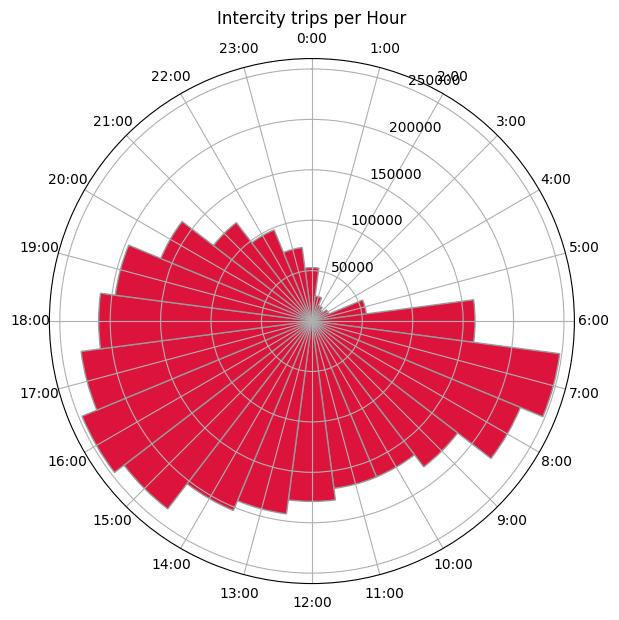

In [ ]:
plt.figure(figsize = (15,15))
ax = plt.subplot(2,2,1, polar=True)
    # make the histogram that bined on 24 hour
radii = np.array(df_from.iloc[:, 2:26].sum().tolist(), dtype="int64")
title = "Intercity trips per Hour"
clock(ax, radii, title, "#dc143c")

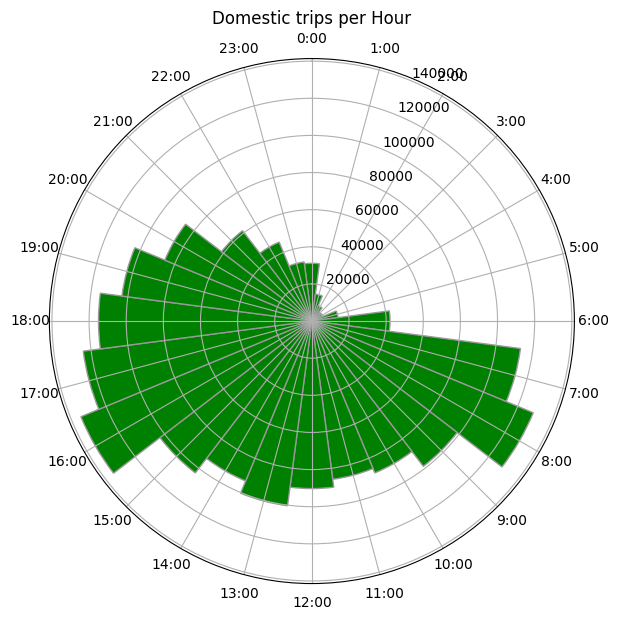

In [ ]:
plt.figure(figsize = (15,15))
ax = plt.subplot(2,2,1, polar=True)
    # make the histogram that bined on 24 hour
radii = np.array(df_within.iloc[:, 2:26].sum().tolist(), dtype="int64")
title = "Domestic trips per Hour"
clock(ax, radii, title, "green")

##### 2.4.4.2 **Trip data per municipality per hour**
Studying the distribution of trips on a 24-hour scale.

##### Studies of interesting cases that we found in the graphs

In [ ]:
# From the graph we can see that Beer Sheva saw a sharp increase in local travel between 10:00 and 10:59.
# Let's try to study this situation.


# Let's take the hours h9, h10 and h11 and see in which zone the peak occurred at h10.
db_BS_9_11 = df_within[df_within['Municipality_A']=='Beer Sheva'].iloc[:, [0,1, 11,12,13,27]]

db_BS_9_11['avg_9_11'] = (db_BS_9_11['h9'] + db_BS_9_11['h10'] + db_BS_9_11['h11']) / 3
db_BS_9_11['h10_peak'] = (db_BS_9_11['h10'] - db_BS_9_11['avg_9_11'])/ db_BS_9_11['avg_9_11']
db_BS_9_11[db_BS_9_11['h10_peak']>1] # The increase is more than 2 times.

,fromZone,ToZone,h9,h10,h11,Distance_CenterTA_A,avg_9_11,h10_peak


In [ ]:
# From the table we see that the bulk of the increase in domestic travel occurred within zone 101097,
# where there was a sharp increase of more than 7,000 people.

# Let's find out what kind of zone 101097 is.
# In the definition file - celular1819_statistical_data_v01_utf-8.csv.
#  There is a description of the areas by their numbers.
# source of thr file: https://data.gov.il/dataset/tripscelular_1819

file_name = path + '/Data/celular1819_v1.3/celular1819_statistical_data_v01_utf-8.csv'

statistical_data_zones = pd.read_csv(file_name, encoding='cp1252')

statistical_data_zones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 84 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Area 1270                                          1270 non-null   int64  
 1   1270 model area                                    1270 non-null   int64  
 2   Linked to model-area model layer 250               1270 non-null   int64  
 3   Linked to the main area-model layer (33)           1270 non-null   int64  
 4   linked to the model-area layer on (15)             1270 non-null   int64  
 5   Source model                                       1270 non-null   object 
 6   Source model_ENG                                   1270 non-null   object 
 7   Symbol of a settlement/local authority             1238 non-null   object 
 8   Number of polygons from 2640                       1270 non-null   int64  
 9   Municipa

In [ ]:
statistical_data_zones[statistical_data_zones['Area 1270']== 101097].iloc[:, [0,10, 12,22,79]]

,Area 1270,Municipal affiliation_ENG,Area detail_ENG,Population-2019,Workers who live in the traffic area
1096,101097,Beer Sheva,Shchuna J,"15,263","7,831"


#### **Brief conclusion from the analysis 2.4.4:**


1. **In Israel**, rush hour for intercity travel starts from 6:00 to 09:00 in the morning and from 15:00 to 18:00 in the evening. On the other hand, intracity travel rush hour starts at 07:00 and ends at 9 in the morning and starts at 16:00 and ends at 18:00.

2. The time distribution of domestic trips in cities such as **Be'er Sheva, Yerusamim, Petah Tikva, Reshon LeZion** is very similar: from 7:00 to 9:00, about 6-7% of the total population of the city travel every hour. In Tel Aviv, rush hour starts 1 hour later from 8:00 to 10:00

3. As we saw earlier, in **Tel Aviv** there are more than 2.5 - 3 times more intercity passengers than in the morning. Probably in the evening workers from Tel Aviv will return home.

4.  in **Haifa** the situation is similar to Tel Aviv - there are 2 times more intercity passengers than in the morning.

5. In **Jerusalem** there are very few intercity flights in the morning and evening - 6 times less than domestic trips.

6. In **Beer Sheva**, local travel experiences a sharp and inexplicable increase in travel from 10:00 to 10:59.


#### 2.4.5 **Analysis of MotoRate**

In [ ]:
trip_df['MotoRate_A'].describe()

count    219282.000000
mean        461.480651
std          90.115619
min         105.096460
25%         394.000000
50%         470.624849
75%         521.004214
max         626.350267
Name: MotoRate_A, dtype: float64

In [ ]:
# Distribution of MotoRate by municipalities
df_MotoRate_Socio_municipal = trip_df.groupby(['Municipality_A'] , as_index=False ).agg({'MotoRate_A':'mean','Socio_Economic_Index_A':'max'})


df_MotoRate_Socio_municipal_sorted = df_MotoRate_Socio_municipal.sort_values(by = 'MotoRate_A', ascending=False)

# df_MotoRate_Socio_municipal_sorted.tail(10)
df_MotoRate_Socio_municipal_sorted[df_MotoRate_Socio_municipal_sorted['Municipality_A']=='Petah Tikva']
# df_MotoRate_Socio_municipal_sorted[df_MotoRate_Socio_municipal_sorted['Municipality_A']=='Givat Shmuel']

,Municipality_A,MotoRate_A,Socio_Economic_Index_A
52,Petah Tikva,419.471772,7.0


Conclusion from the table: As we can see, there is no motor rate data for the municipality of Or Akiva.

Let's try to understand whether there is a relationship between the socioeconomic index and motor rate

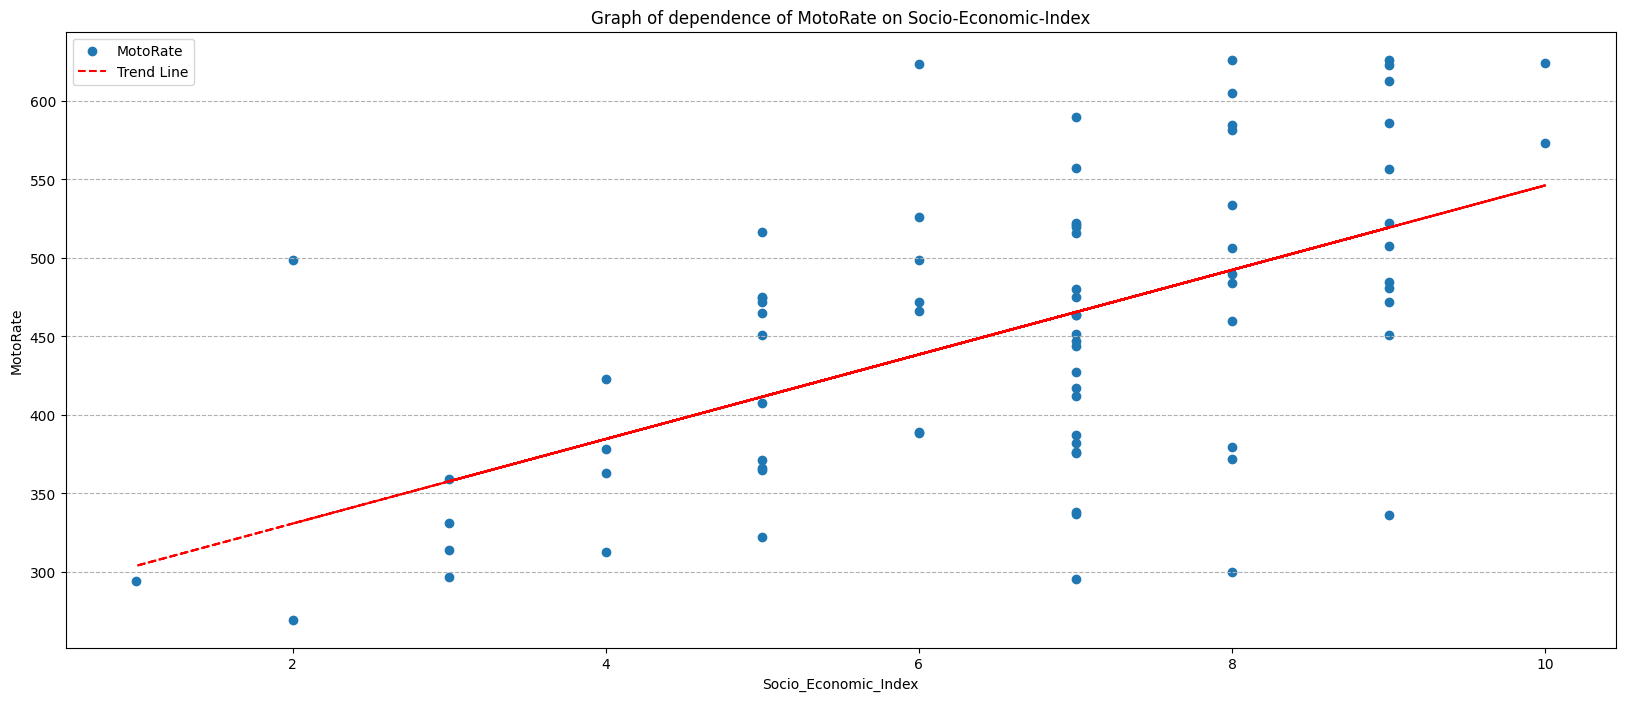

In [ ]:
# A relationship between the socioeconomic index and motor rate

# Delete lines with any NaN values
df_MotoRate_Soco_municipal_cleaned = df_MotoRate_Socio_municipal_sorted.dropna()


# Calculate the Trend Line of the relationship between A and B
z = np.polyfit(df_MotoRate_Soco_municipal_cleaned['Socio_Economic_Index_A'], df_MotoRate_Soco_municipal_cleaned['MotoRate_A'], 1)
p = np.poly1d(z)




# build a graph of dependence of MotoRateon Socio_Economic_Index
fig, ax = plt.subplots(1, figsize =(20,8))

plt.scatter(df_MotoRate_Soco_municipal_cleaned['Socio_Economic_Index_A'], df_MotoRate_Soco_municipal_cleaned['MotoRate_A'])
plt.plot(df_MotoRate_Soco_municipal_cleaned['Socio_Economic_Index_A'], p(df_MotoRate_Soco_municipal_cleaned['Socio_Economic_Index_A']), 'r--', label='Trend Line')
plt.xlabel('Socio_Economic_Index')
plt.ylabel('MotoRate')
plt.title('Graph of dependence of MotoRate on Socio-Economic-Index')
plt.legend(['MotoRate', 'Trend Line'])

# Set  font size for all elements of the plot
# plt.rc('font', size=20) # Default text size
plt.rc('axes', titlesize=20) # Title size
plt.rc('axes', labelsize= 20) # Size of x and y axis labels
plt.rc('ytick', labelsize=20) # Size of tick marks along the y axis
plt.rc('legend', fontsize=20) # Legend font size

plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
# # Let's fill in the missing data in the column - 'MotoRate'  for the municipality 'Or Akiva'
# # with the average value for the socioeconomic index = 5

# mean_MotoRate_for_Socio_Economic_Index_5 = trip_df[trip_df['Socio_Economic_Index_A']==5]['MotoRate_A'].mean()
# print(mean_MotoRate_for_Socio_Economic_Index_5)


# trip_df.loc[trip_df['Municipality_A'] == 'Or Akiva', 'MotoRate_A'] = mean_MotoRate_for_Socio_Economic_Index_5
# trip_df.loc[trip_df['Municipality_B'] == 'Or Akiva', 'MotoRate_B'] = mean_MotoRate_for_Socio_Economic_Index_5
# trip_df.loc[trip_df['Municipality_A'] == 'Or Akiva', 'MotoRate_A']

In [ ]:
# Let's calculate the distribution of motor rates and Level_ultra-Orthodox for municipalities
df_MotoRate_ultra_municipal = trip_df.groupby(['Municipality_A'] , as_index=False ).agg({'MotoRate_A':'mean','Level_ultra-Orthodox_A':'max'})


df_MotoRate_ultra_municipal_sorted = df_MotoRate_ultra_municipal.sort_values(by = 'MotoRate_A', ascending=False)
df_MotoRate_ultra_municipal_sorted.tail(10)

,Municipality_A,MotoRate_A,Level_ultra-Orthodox_A
30,Kalanswa,331.353144,NaN
33,Kfar Habad,322.553638,NaN
8,Benyamin Regional Council,319.504258,NaN
32,Kfar Bara,312.800164,NaN
29,Kafr Qasim,312.448098,NaN
20,Givat Shmuel,300.000000,NaN
28,Jaljulia,296.482529,NaN
22,Hasmoneans,295.212010,NaN
44,Modi'in Illit,294.263156,1.0
14,Elad,267.881606,2.0


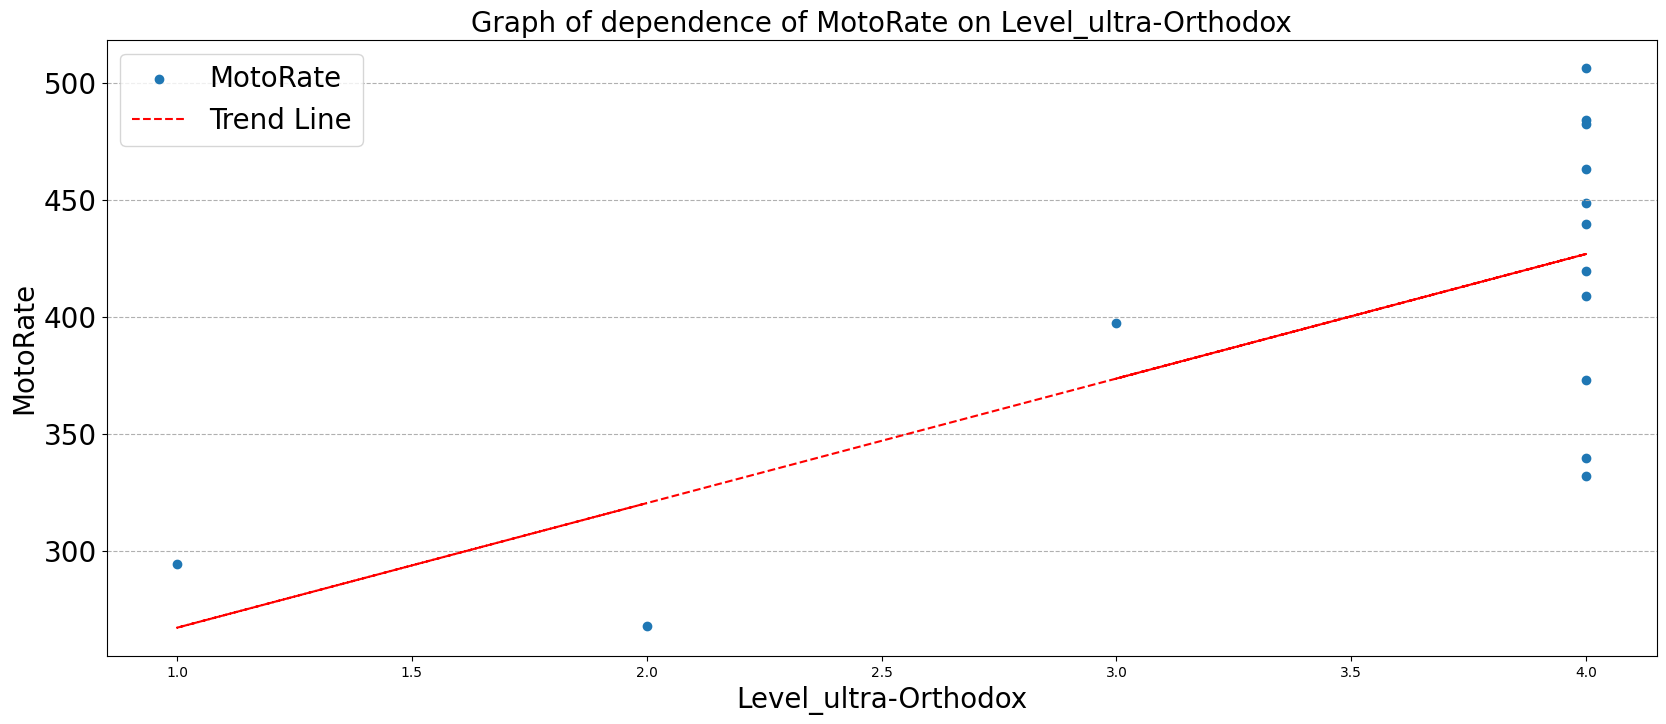

In [ ]:
# A relationship between the Level_ultra-Orthodox index and motor rate

# Delete lines with any NaN values
df_MotoRate_ultra_municipal_cleaned = df_MotoRate_ultra_municipal_sorted.dropna()


# Calculate the Trend Line of the relationship between A and B
z = np.polyfit(df_MotoRate_ultra_municipal_cleaned['Level_ultra-Orthodox_A'], df_MotoRate_ultra_municipal_cleaned['MotoRate_A'], 1)
p = np.poly1d(z)




# build a graph of dependence of MotoRateon Socio_Economic_Index
fig, ax = plt.subplots(1, figsize =(20,8))

plt.scatter(df_MotoRate_ultra_municipal_cleaned['Level_ultra-Orthodox_A'], df_MotoRate_ultra_municipal_cleaned['MotoRate_A'])
plt.plot(df_MotoRate_ultra_municipal_cleaned['Level_ultra-Orthodox_A'], p(df_MotoRate_ultra_municipal_cleaned['Level_ultra-Orthodox_A']), 'r--', label='Trend Line')
plt.xlabel('Level_ultra-Orthodox')
plt.ylabel('MotoRate')
plt.title('Graph of dependence of MotoRate on Level_ultra-Orthodox')
plt.legend(['MotoRate', 'Trend Line'])

# Set  font size for all elements of the plot
# plt.rc('font', size=20) # Default text size
plt.rc('axes', titlesize=20) # Title size
plt.rc('axes', labelsize= 20) # Size of x and y axis labels
plt.rc('ytick', labelsize=20) # Size of tick marks along the y axis
plt.rc('legend', fontsize=20) # Legend font size

plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222570 entries, 18 to 1506474
Data columns (total 69 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   fromZone                222570 non-null  int64   
 1   ToZone                  222570 non-null  int64   
 2   h0                      222570 non-null  float64 
 3   h1                      222570 non-null  float64 
 4   h2                      222570 non-null  float64 
 5   h3                      222570 non-null  float64 
 6   h4                      222570 non-null  float64 
 7   h5                      222570 non-null  float64 
 8   h6                      222570 non-null  float64 
 9   h7                      222570 non-null  float64 
 10  h8                      222570 non-null  float64 
 11  h9                      222570 non-null  float64 
 12  h10                     222570 non-null  float64 
 13  h11                     222570 non-null  float64 
 14  h12    

In [ ]:
trip_MotoRate_A_null_df= trip_df[trip_df['MotoRate_A'].isnull()][['Municipality_A', 'Municipality_B','MotoRate_A', 'MotoRate_B']]

trip_MotoRate_A_null_df.groupby(['Municipality_A', 'Municipality_B'] , as_index=False ).agg({'MotoRate_B':'mean'})

,Municipality_A,Municipality_B,MotoRate_B
0,Givat Shmuel,A local council commemorates its homes,450.834428
1,Givat Shmuel,Area,463.941523
2,Givat Shmuel,Ashdod,467.831165
3,Givat Shmuel,Bat Yam,448.516545
4,Givat Shmuel,Be'er Ya'akov,375.784646
...,...,...,...
150,Petah Tikva,Yavne,408.619773
151,Petah Tikva,Yavne Region Regional Council,475.151573
152,Petah Tikva,Yedin Camp - Zerifin,337.903700
153,Petah Tikva,Yehud,465.019975


In [ ]:
trip_MotoRate_B_null_df= trip_df[trip_df['MotoRate_B'].isnull()][['Municipality_A', 'Municipality_B','MotoRate_A', 'MotoRate_B']]

trip_MotoRate_B_null_df.groupby(['Municipality_B'] , as_index=False ).agg({'MotoRate_A':'mean'})

,Municipality_B,MotoRate_A


In [ ]:
# Fill in the missing data in MotoRate_A & MotoRate_B with average index Petah Tikva
trip_df['MotoRate_A'].fillna(419, inplace = True)
trip_df['MotoRate_B'].fillna(419, inplace = True)

#### **Brief conclusion from the analysis 2.4.5:**

1. There is a linear relationship between motorite and socio-economic index. In cities with a socioeconomic index equal to 1-2, there are on average 350 cars per 1000 people, in cities with a socioeconomic index equal to 9-10 there are 500-520 cars per 1000 inhabitants

2. There is a linear relationship between motorite and the level of Orthodoxy in a city. In cities with a level of Orthodoxy equal to 1-2 (relatively many Orthodox) there are on average 300-350 cars per 1000 people, in cities with a low level of Orthodoxy 3-4 there are 400-470 cars per 1000 inhabitants

<a id=Density_jobs></a>
#### 2.4.6 **Analysis of Density jobs**
***

In [ ]:
trip_df['Density_jobs3_A'].describe()

count    219752.000000
mean       4032.847484
std        6498.909339
min           1.195589
25%         938.144367
50%        2123.916982
75%        4398.951218
max       90635.721403
Name: Density_jobs3_A, dtype: float64

In [ ]:
# Distribution of Density jobs by municipalities
df_Density_jobs_Socio_municipal = trip_df.groupby(['Municipality_A'] , as_index=False ).agg({'Density_jobs3_A':'mean','Socio_Economic_Index_A':'max', 'Population_A':'mean'})
# df_Density_jobs_Socio_municipal = trip_df.groupby(['Municipality_A'] , as_index=False ).agg({'Density_jobs3_A':'max','Socio_Economic_Index_A':'max'})


df_Density_jobs_municipal_sorted = df_Density_jobs_Socio_municipal.sort_values(by = 'Density_jobs3_A', ascending=False)

df_Density_jobs_municipal_sorted.tail(10)


,Municipality_A,Density_jobs3_A,Socio_Economic_Index_A,Population_A
23,Hebol Modi'in Regional Council,165.644233,7.0,2612.576030
18,Gedrot Regional Council,145.027999,9.0,8236.000000
11,Camp Rehoboam,134.967590,6.0,NaN
50,Ornit,105.931938,8.0,21260.000000
19,Gezer Regional Council,85.037679,8.0,3499.119302
74,Yavne Region Regional Council,67.991600,7.0,1817.000000
46,Nachshonim base,66.862811,4.0,NaN
62,Samaria Regional Council,59.859341,7.0,7852.100000
31,Kalkilia,57.201894,4.0,NaN
71,The Center for Nuclear Research whistles,49.687899,7.0,0.000000


In [ ]:
df_Density_jobs_municipal_sorted.head(10)

,Municipality_A,Density_jobs3_A,Socio_Economic_Index_A,Population_A
54,Ramat Gan,10822.428061,8.0,7431.724257
20,Givat Shmuel,10585.153881,8.0,13289.000000
67,Tel Aviv Jaffa,9425.372868,8.0,7007.789669
36,Kiryat Airport,7327.686202,7.0,NaN
21,Givatayim,6840.955972,9.0,10020.809507
9,Bnei Brak,6371.641435,2.0,15177.358241
48,Netanya,4951.538388,6.0,8420.547199
52,Petah Tikva,4522.335782,7.0,8170.646729
49,Or Yehuda,3990.891385,5.0,6137.227853
34,Kfar Saba,3832.975454,8.0,5340.395424


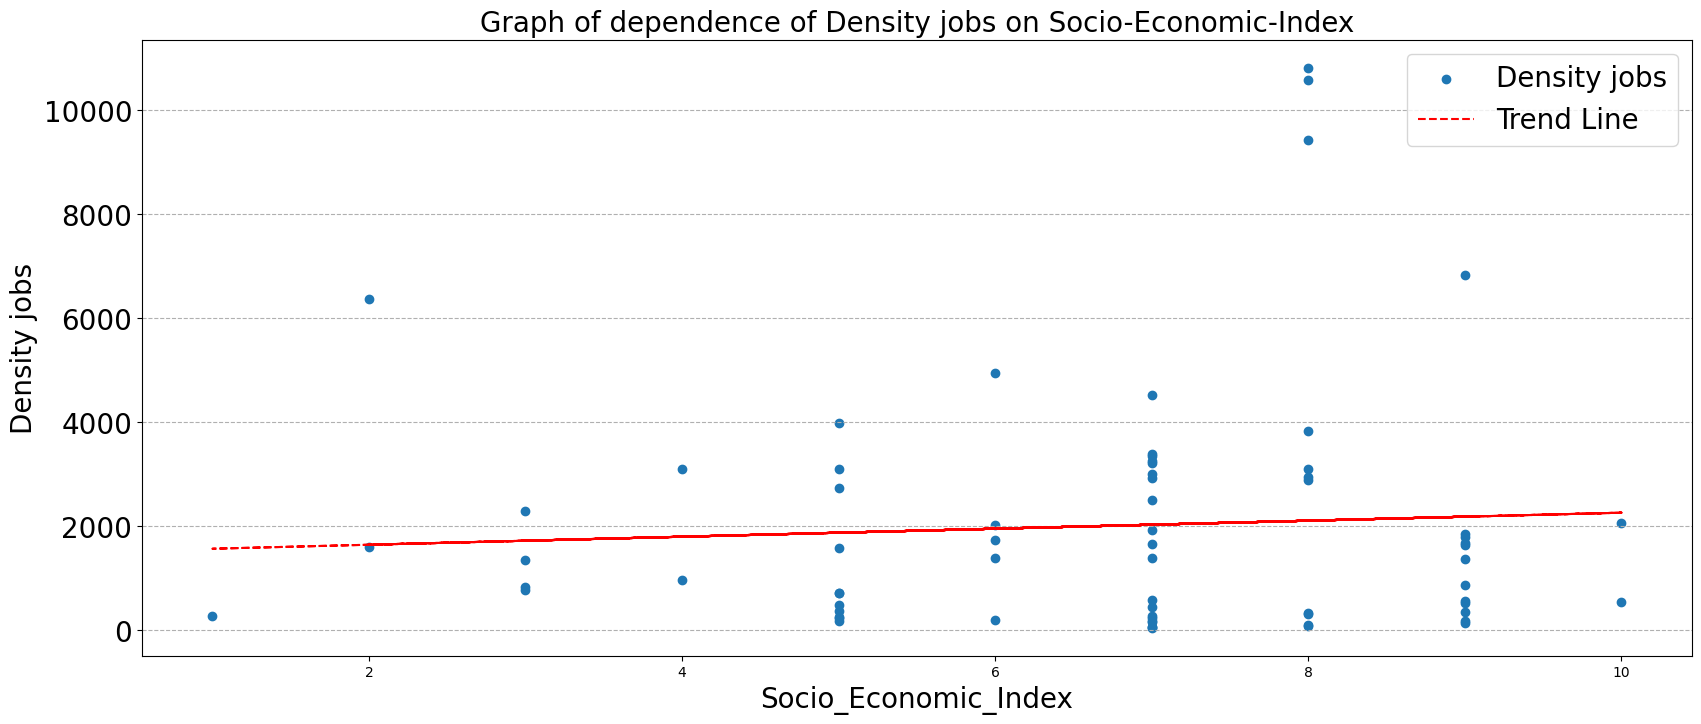

In [ ]:
# A relationship between the socioe-conomic index and Density jobs

# Delete lines with any NaN values
df_Density_jobs_municipal_cleaned = df_Density_jobs_municipal_sorted.dropna()


# Calculate the Trend Line of the relationship between A and B
z = np.polyfit(df_Density_jobs_municipal_cleaned['Socio_Economic_Index_A'], df_Density_jobs_municipal_cleaned['Density_jobs3_A'], 1)
p = np.poly1d(z)




# build a graph of dependence of Density jobs Socio-Economic_Index
fig, ax = plt.subplots(1, figsize =(20,8))

plt.scatter(df_Density_jobs_municipal_cleaned['Socio_Economic_Index_A'], df_Density_jobs_municipal_cleaned['Density_jobs3_A'])
plt.plot(df_Density_jobs_municipal_cleaned['Socio_Economic_Index_A'], p(df_Density_jobs_municipal_cleaned['Socio_Economic_Index_A']), 'r--', label='Trend Line')
plt.xlabel('Socio_Economic_Index')
plt.ylabel('Density jobs')
plt.title('Graph of dependence of Density jobs on Socio-Economic-Index')
plt.legend(['Density jobs', 'Trend Line'])

# Set  font size for all elements of the plot
# plt.rc('font', size=20) # Default text size
plt.rc('axes', titlesize=20) # Title size
plt.rc('axes', labelsize= 20) # Size of x and y axis labels
plt.rc('ytick', labelsize=20) # Size of tick marks along the y axis
plt.rc('legend', fontsize=20) # Legend font size

plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
# Combining 2 dataframes: population statistics (stat_municipal) and travel data (df_municipal_sum_sorted) for each municipality

df_municipal_jobs = pd.merge(df_Density_jobs_municipal_sorted, stat_municipal, left_on='Municipality_A', right_on='Municipality')
df_municipal_jobs.drop(['Municipality'], axis=1, inplace=True)

df_municipal_jobs

,Municipality_A,Density_jobs3_A,Socio_Economic_Index_A,Population_A,Population,Arab_population,Workers,Area_m2,Level_ultra-Orthodox,Socio_Economic_Index
0,Ramat Gan,10822.428061,8.0,7431.724257,156001.0,0.0,85150.0,1.645406e+07,NaN,8.0
1,Givat Shmuel,10585.153881,8.0,13289.000000,26578.0,0.0,12000.0,2.617585e+06,NaN,8.0
2,Tel Aviv Jaffa,9425.372868,8.0,7007.789669,433653.0,6532.0,249187.0,5.990340e+07,3.857143,8.0
3,Kiryat Airport,7327.686202,7.0,NaN,0.0,0.0,0.0,1.012557e+06,NaN,NaN
4,Givatayim,6840.955972,9.0,10020.809507,60157.0,0.0,36560.0,3.168701e+06,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...
73,Yavne Region Regional Council,67.991600,7.0,1817.000000,4752.0,0.0,2168.0,2.243489e+07,NaN,7.0
74,Nachshonim base,66.862811,4.0,NaN,0.0,0.0,0.0,8.388860e+06,NaN,NaN
75,Samaria Regional Council,59.859341,7.0,7852.100000,52076.0,0.0,21333.0,1.148044e+09,NaN,7.0
76,Kalkilia,57.201894,4.0,NaN,0.0,0.0,0.0,9.855014e+06,NaN,NaN


In [ ]:
# # Let's fill in the missing data in the column - 'Density jobs'  for the municipality 'Or Akiva'
# # with the average value for the socioeconomic index = 5

# mean_Density_jobs_for_Population = (df_municipal_jobs[df_municipal_jobs['Municipality_A']=='Or Akiva']['Population_A']*p[1]+p[0]).iloc[0]

# print(mean_Density_jobs_for_Population)


# trip_df.loc[trip_df['Municipality_A'] == 'Or Akiva', 'Density_jobs3_A'] = mean_Density_jobs_for_Population
# trip_df.loc[trip_df['Municipality_B'] == 'Or Akiva', 'Density_jobs3_B'] = mean_Density_jobs_for_Population


In [ ]:
# Let's fill in the missing data in the column - “Job density” for the municipality (zone) “School of Military Engineering	” with equal 0, since we assume that work density = 0

trip_df.loc[trip_df['Municipality_A'] == 'School of Military Engineering', 'Density_jobs3_A'] = 0
trip_df.loc[trip_df['Municipality_B'] == 'School of Military Engineering', 'Density_jobs3_B'] = 0


In [ ]:
# Distribution of Density jobs by municipalities
# df_Density_jobs_Socio_municipal = trip_df.groupby(['Municipality_A'] , as_index=False ).agg({'Density_jobs3_A':'max','Socio_Economic_Index_A':'max', 'Pop_Density_Sqkm_A':'mean'})
df_Density_jobs_Socio_municipal = trip_df.groupby(['Municipality_A'] , as_index=False ).agg({'Density_jobs3_A':'max','Socio_Economic_Index_A':'max'})


df_Density_jobs_municipal_sorted = df_Density_jobs_Socio_municipal.sort_values(by = 'Density_jobs3_A', ascending=False)

df_Density_jobs_municipal_sorted.tail(10)

,Municipality_A,Density_jobs3_A,Socio_Economic_Index_A
68,Tel Mond local council,172.000000,9.0
18,Gedrot Regional Council,145.027999,9.0
19,Gezer Regional Council,136.561389,8.0
11,Camp Rehoboam,134.967590,6.0
62,Samaria Regional Council,109.647859,7.0
50,Ornit,105.931938,8.0
74,Yavne Region Regional Council,67.991600,7.0
46,Nachshonim base,66.862811,4.0
31,Kalkilia,57.201894,4.0
71,The Center for Nuclear Research whistles,49.687899,7.0


#### **Brief conclusion from the analysis** 2.4.6:
1. There is a  relationship between Density jobs and Population

#### 2.4.7 **Analysis of Average age**










###### 2.4.7.1 Let's now see what kind of connection we have between average age and socio-economic index in each municipality.

In [ ]:
# Let's calculate the average age in each municipality.
df_age_muni = trip_df.groupby(['Municipality_A'] , as_index=False ).agg({'Average_age_A':'mean', 'Socio_Economic_Index_A':'mean'})

# Delete lines with any NaN values
df_age_muni_cleaned = df_age_muni.dropna().sort_values(by = 'Average_age_A', ascending=False)

df_age_muni_cleaned

,Municipality_A,Average_age_A,Socio_Economic_Index_A
3,Bat Yam,41.833511,5.000000
57,Rishon Lezion,39.432208,7.000000
24,Herzliya,39.364215,8.148899
60,SAVION,39.000000,10.000000
34,Kfar Saba,38.876782,8.000000
...,...,...,...
5,Beit Berl,25.000000,6.000000
32,Kfar Bara,25.000000,4.000000
33,Kfar Habad,24.000000,5.000000
14,Elad,20.001412,2.000000


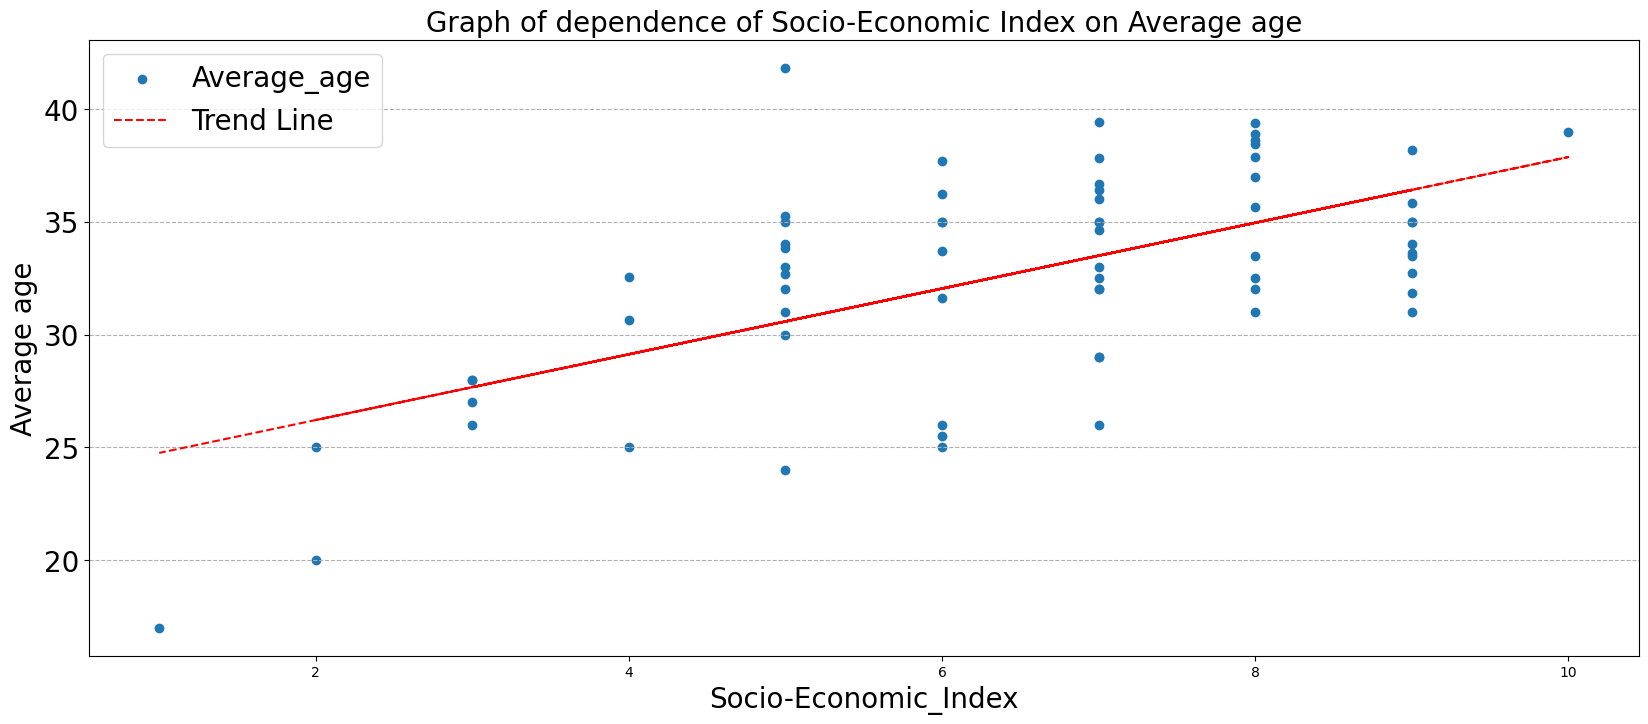

In [ ]:

# build a graph of dependence of Average_age vs  Socio-Economic_Index

# Calculate the Trend Line of the relationship between Average_age vs  Socio-Economic_Index
z = np.polyfit(df_age_muni_cleaned['Socio_Economic_Index_A'] , df_age_muni_cleaned['Average_age_A'],  1)
p = np.poly1d(z)

fig, ax = plt.subplots(1, figsize =(20,8))

plt.scatter( df_age_muni_cleaned['Socio_Economic_Index_A'].round().astype(int), df_age_muni_cleaned['Average_age_A'])
plt.plot(df_age_muni_cleaned['Socio_Economic_Index_A'], p(df_age_muni_cleaned['Socio_Economic_Index_A']), 'r--', label='Trend Line')

plt.xlabel('Socio-Economic_Index')
plt.ylabel('Average age')
plt.title('Graph of dependence of Socio-Economic Index on Average age')
plt.legend(['Average_age', 'Trend Line', 'Avg'])

# Set  font size for all elements of the plot
# plt.rc('font', size=20) # Default text size
plt.rc('axes', titlesize=20) # Title size
plt.rc('axes', labelsize= 20) # Size of x and y axis labels
plt.rc('ytick', labelsize=20) # Size of tick marks along the y axis
plt.rc('legend', fontsize=20) # Legend font size

plt.grid(axis='y', linestyle='--')
plt.show()

###### 2.4.7.2 Let's study and fill in the missing data on average age.

In [ ]:
trip_df['Average_age_A'].isna().sum()

44171

In [ ]:
df_nan_age = trip_df[trip_df['Average_age_A'].isna()]
df_nan_age.iloc[:, [33, 34, 35, 36,37,38,39,40, 41,42,43,44,45]]

,TMA_Distance_A,MotoRate_A,Density_jobs3_A,Industrial_Distance_A,Municipality_A,Population_A,Average_age_A,Level_ultra-Orthodox_A,Land_use_A,Workers_A,Area_m2_A,Pop_Density_Sqkm_A,Socio_Economic_Index_A
58,388.230762,335.929456,4044.127701,0.000000,Ramat Hasharon,0.0,NaN,NaN,employment and trade,0.0,692792.0,0.0,9.0
180,0.000000,416.000000,11819.446426,0.000000,Yehud,0.0,NaN,NaN,industry,0.0,620602.0,0.0,7.0
198,9110.411412,459.880333,218.906374,0.000000,Come on - Zoran,0.0,NaN,NaN,industry,0.0,266714.0,0.0,8.0
248,10.891609,434.509722,1894.681769,0.000000,Holon,0.0,NaN,NaN,Tourism and recreation,0.0,299827.0,0.0,7.0
278,0.000000,337.282586,992.824635,0.000000,Be'er Ya'akov,0.0,NaN,NaN,industry and military,0.0,8202420.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506238,3399.904807,376.000000,7327.686202,0.000000,Kiryat Airport,NaN,NaN,NaN,industry,0.0,1012557.0,0.0,7.0
1506329,0.000000,546.806667,1934.687093,1716.605882,Tel Aviv Jaffa,0.0,NaN,NaN,cemetery,0.0,473228.0,0.0,8.0
1506393,343.064127,386.683465,10854.391074,0.000000,Lod,0.0,NaN,NaN,Industry and craft,0.0,1149357.0,0.0,4.0
1506427,0.000000,556.992120,937.725258,0.000000,Rishon Lezion,0.0,NaN,NaN,Commerce + Industry,0.0,974711.0,0.0,7.0


######2.4.7.2.1 Let's fill in the missing data in the column - 'Average_age'


In [ ]:
# Let's calculate the average age in Israel
avg_age = df_age_muni_cleaned['Average_age_A'].mean()
print(f'The average age in Israel is{avg_age: .1f} years ')

The average age in Israel is 32.6 years 


In [ ]:
# Let's fill in the missing data in the column - 'Average_age' with the average age in Israel


trip_df.loc[trip_df['Average_age_A'].isna()  , 'Average_age_A'] = avg_age
trip_df.loc[trip_df['Average_age_B'].isna()  , 'Average_age_B'] = avg_age

trip_df['Average_age_A'].isna().sum()

0

#### **Brief conclusion from the analysis** 2.4.7:
1. There is a relationship between average age and socio-economic index. The higher the socioeconomic index, the higher the average age
2. We filled in the missing data for the “average age” column as a value equal to the average age in Israel

#### 2.4.8 **Analysis of Level ultra-Orthodox**

In [ ]:
# Let's study and fill in the missing data on  Level ultra-Orthodox

In [ ]:
trip_df['Level_ultra-Orthodox_A'].isna().sum()

198185

In [ ]:
# Let's calculate the average Level ultra-Orthodox in each municipality.
df_Orthodox_muni = trip_df.groupby(['Municipality_A'] , as_index=False ).agg({'Level_ultra-Orthodox_A':'mean', 'Socio_Economic_Index_A':'mean'})

# Delete lines with any NaN values
df_Orthodox_cleaned = df_Orthodox_muni.dropna().sort_values(by = 'Level_ultra-Orthodox_A', ascending=True)

df_Orthodox_cleaned

,Municipality_A,Level_ultra-Orthodox_A,Socio_Economic_Index_A
44,Modi'in Illit,1.000000,1.00000
9,Bnei Brak,1.616885,2.00000
14,Elad,2.000000,2.00000
52,Petah Tikva,3.603060,7.00000
67,Tel Aviv Jaffa,3.858318,7.90689
3,Bat Yam,4.000000,5.00000
26,Holon,4.000000,7.00000
42,Lod,4.000000,4.00000
48,Netanya,4.000000,6.00000
49,Or Yehuda,4.000000,5.00000


1. The highest percentage of ultra-Orthodox in cities where the level is 1, the lowest level of ultra-Orthodox when the level is 4.
2. Let's create a new level equal to 5, in areas where there is almost no loss of orthodoxy.

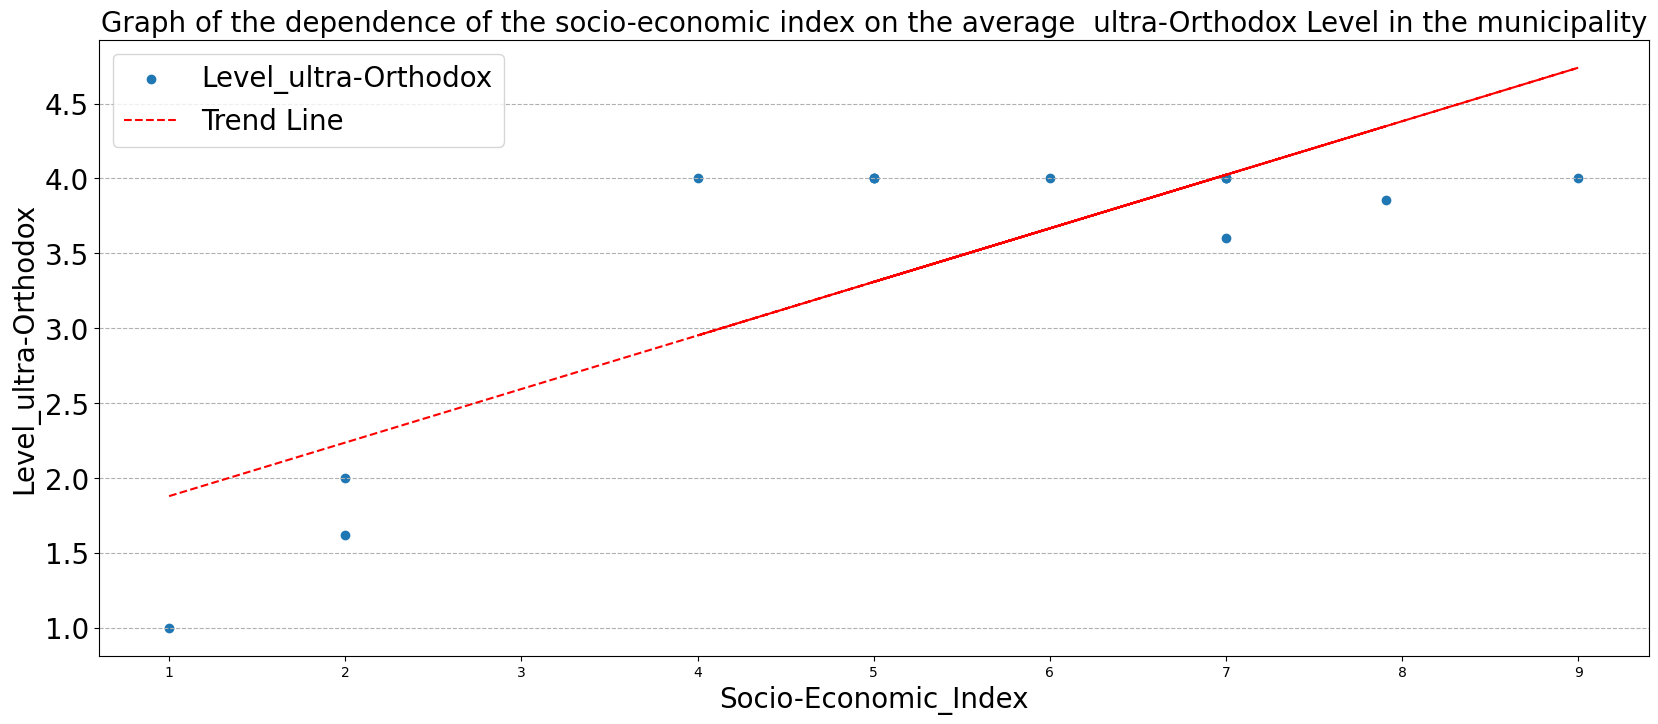

In [ ]:
# build a graph of dependence of Level_ultra-Orthodox vs  Socio-Economic_Index

# Calculate the Trend Line of the relationship between Level_ultra-Orthodox vs  Socio-Economic_Index
z = np.polyfit(df_Orthodox_cleaned['Socio_Economic_Index_A'] , df_Orthodox_cleaned['Level_ultra-Orthodox_A'],  1)
p = np.poly1d(z)

fig, ax = plt.subplots(1, figsize =(20,8))

plt.scatter( df_Orthodox_cleaned['Socio_Economic_Index_A'], df_Orthodox_cleaned['Level_ultra-Orthodox_A'])
plt.plot(df_Orthodox_cleaned['Socio_Economic_Index_A'], p(df_Orthodox_cleaned['Socio_Economic_Index_A']), 'r--', label='Trend Line')

plt.xlabel('Socio-Economic_Index')
plt.ylabel('Level_ultra-Orthodox')
plt.title('Graph of the dependence of the socio-economic index on the average  ultra-Orthodox Level in the municipality')
plt.legend(['Level_ultra-Orthodox', 'Trend Line'])

# Set  font size for all elements of the plot
# plt.rc('font', size=20) # Default text size
plt.rc('axes', titlesize=20) # Title size
plt.rc('axes', labelsize= 20) # Size of x and y axis labels
plt.rc('ytick', labelsize=20) # Size of tick marks along the y axis
plt.rc('legend', fontsize=20) # Legend font size

plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
trip_df.loc[trip_df['Level_ultra-Orthodox_A'].isna()  , 'Level_ultra-Orthodox_A'] = 5
trip_df.loc[trip_df['Level_ultra-Orthodox_B'].isna()  , 'Level_ultra-Orthodox_B'] = 5

trip_df['Level_ultra-Orthodox_A'].isna().sum()

0

In [ ]:
# Let's now re-calculate the average level of ultra-Orthodox in each municipality.
df_Orthodox_muni_new = trip_df.groupby(['Municipality_A'] , as_index=False ).agg({'Level_ultra-Orthodox_A':'mean', 'Socio_Economic_Index_A':'mean'})

# Delete lines with any NaN values
df_Orthodox_new_cleaned = df_Orthodox_muni_new.sort_values(by = 'Level_ultra-Orthodox_A', ascending=True)

df_Orthodox_new_cleaned

,Municipality_A,Level_ultra-Orthodox_A,Socio_Economic_Index_A
44,Modi'in Illit,1.000000,1.000000
9,Bnei Brak,1.859382,2.000000
14,Elad,2.000000,2.000000
49,Or Yehuda,4.333097,5.000000
56,Ramla,4.625399,5.000000
...,...,...,...
25,Hod Hasharon,5.000000,9.000000
24,Herzliya,5.000000,8.148899
23,Hebol Modi'in Regional Council,5.000000,5.704177
21,Givatayim,5.000000,9.000000


#### **Brief conclusion from the analysis** 2.4.8:
1. There is a relationship between the level of ultra-Orthodox and the socio-economic index. The higher the socio-economic index, the higher the level of ultra-Orthodox (the lower the density of ultra-Orthodox in the city)
2. We filled in the missing data in the column “level of ultra-Orthodox” as the new largest level (5) - the smallest density of ultra-Orthodox in the zone.

#### 2.4.9 **Analysis of Socio Economic Index**

#### **Brief conclusion from the analysis** 2.4.9:
As we saw above, there are strong relationship between the socio-economic index and the following features:
1. There is a relationship between the level of ultra-Orthodox and the socio-economic index. The higher the socio-economic index, the higher the level of ultra-Orthodox (the lower the density of ultra-Orthodox in the city)
2. There is a relationship between average age and socio-economic index. The higher the socioeconomic index, the higher the average age
3. There is a  relationship between motorite and socio-economic index. In cities with a socioeconomic index equal to 1-2, there are on average 350 cars per 1000 people, in cities with a socioeconomic index equal to 9-10 there are 500-520 cars per 1000 inhabitants

#### 2.4.10 **Analysis of Traveling during rush hours  from Municipality**

Text(0.5, 1.0, 'Wordcloud of cities from which people leave in the Morning rust')

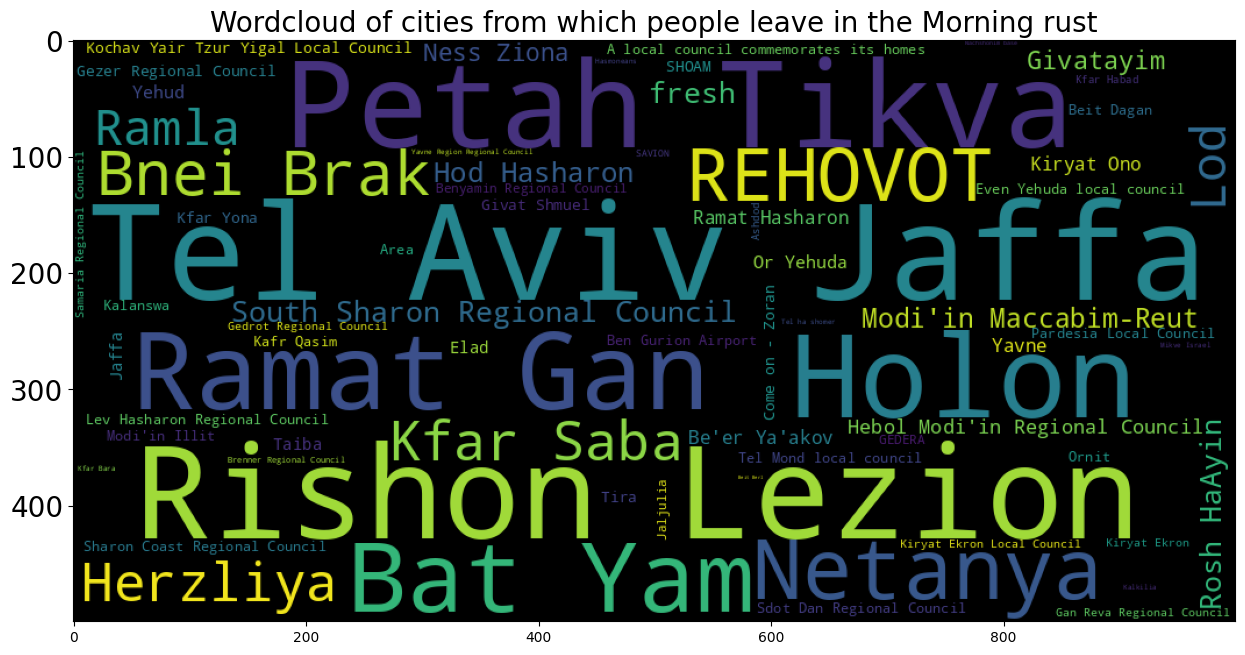

In [ ]:
from wordcloud import WordCloud

df_Travel_from_muni = df_from.groupby(['Municipality_A'] , as_index=False ).agg({'Morning_rush_6_9':'sum', 'Evening_rush_15_18':'sum'})

df_Travel_from_Morning_dict = dict(zip(df_Travel_from_muni['Municipality_A'], df_Travel_from_muni['Morning_rush_6_9']))


wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(df_Travel_from_Morning_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title('Wordcloud of cities from which people leave in the Morning rust')

Text(0.5, 1.0, 'Wordcloud of cities from which people leave in the Evening rush')

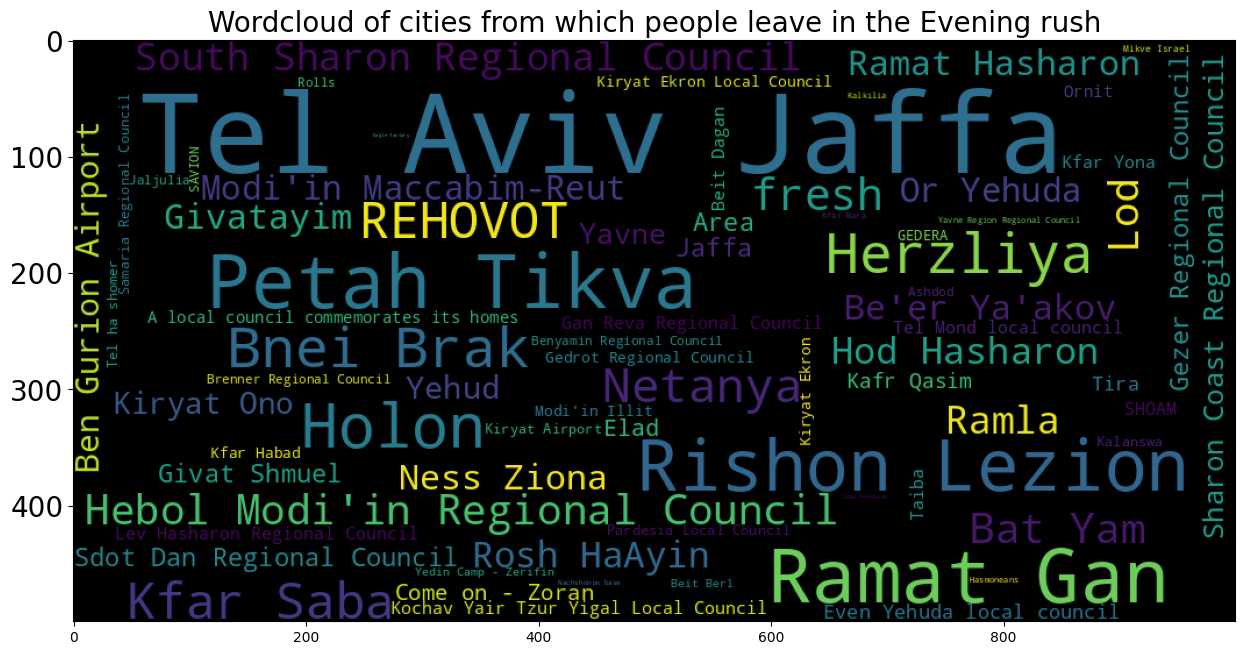

In [ ]:

df_Travel_from_Evening_dict = dict(zip(df_Travel_from_muni['Municipality_A'], df_Travel_from_muni['Evening_rush_15_18']))


wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(df_Travel_from_Evening_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title('Wordcloud of cities from which people leave in the Evening rush')

###### Let's number the municipalities so that each municipality has its own number.

In [ ]:
df_Travel_from_muni_sorted = df_Travel_from_muni.sort_values(by = 'Morning_rush_6_9', ascending=False).reset_index(drop=True)
df_Travel_from_muni_sorted

,Municipality_A,Morning_rush_6_9,Evening_rush_15_18
0,Tel Aviv Jaffa,51200.074031,134317.396244
1,Rishon Lezion,47834.888910,42093.449284
2,Petah Tikva,40919.793099,46994.193722
3,Holon,37842.107730,31721.252649
4,Ramat Gan,32861.829346,46847.806087
...,...,...,...
73,Kiryat Airport,96.367215,1327.873825
74,Camp Rehoboam,60.754833,93.299010
75,Eagle factory,27.807719,46.043817
76,Tel Nof Air Force Base,0.000000,0.000000


In [ ]:
# Create a dictionary where the keys are Municipality_A and the values are their index
Municipality_to_number = dict(zip(df_Travel_from_muni_sorted['Municipality_A'], df_Travel_from_muni_sorted.index))

# Add a new column Municipality_A
trip_df['Municipality_category_A'] = trip_df['Municipality_A'].map(Municipality_to_number)
trip_df['Municipality_category_B'] = trip_df['Municipality_B'].map(Municipality_to_number)

In [ ]:
trip_df[['Municipality_category_A','Municipality_A']]

,Municipality_category_A,Municipality_A
18,2,Petah Tikva
20,0,Tel Aviv Jaffa
23,3,Holon
28,21,Ramat Hasharon
30,23,Yavne
...,...,...
1506442,50,Modi'in Illit
1506457,6,Netanya
1506465,7,REHOVOT
1506470,8,Bnei Brak


#### 2.4.11 **Analysis of Land_use**
This parameter describes how the land on which this Zone is located is used.

In [ ]:
df_Travel_from_Land = df_from.groupby(['Land_use_A'] , as_index=False ).agg({'Morning_rush_6_9':'sum'})
df_Travel_from_Land_sort = df_Travel_from_Land.sort_values(by = 'Morning_rush_6_9', ascending=False)
df_Travel_from_Land_sort

,Land_use_A,Morning_rush_6_9
56,residence,522943.782547
51,industry,25326.523041
7,Employment + residence,12355.575043
41,Tel Aviv Metropolitan Police Department,9475.865740
17,Industry + residential,6764.890927
...,...,...
43,Transportation facility,132.799354
55,port,100.000162
3,Commerce + Industry,64.691898
10,Fanny and vacation,15.708120


In [ ]:
df_Travel_from_Land_sort.set_index('Land_use_A', inplace=True)
df_Travel_from_Land_sort

,Morning_rush_6_9
Land_use_A,
residence,522943.782547
industry,25326.523041
Employment + residence,12355.575043
Tel Aviv Metropolitan Police Department,9475.865740
Industry + residential,6764.890927
...,...
Transportation facility,132.799354
port,100.000162
Commerce + Industry,64.691898


In [ ]:
# Group the data by Land_use and count the number of occurrences of each Land_use
Land_use_counts = df_Travel_from_Land_sort['Morning_rush_6_9']

# Create a dictionary where the keys are cities and the values are their numbers
Land_use_to_number = {land: i + 1 for i, land in enumerate (Land_use_counts.index)}

# Add a new column Land_use_A & Land_use_B
trip_df['Land_use_category_A'] = trip_df['Land_use_A'].map(Land_use_to_number)
trip_df['Land_use_category_B'] = trip_df['Land_use_B'].map(Land_use_to_number)

In [ ]:
Land_use_to_number

{'residence': 1,
 'industry': 2,
 'Employment + residence': 3,
 'Tel Aviv Metropolitan Police Department': 4,
 'Industry + residential': 5,
 'Intended for residential use': 6,
 'Hospital': 7,
 'Airport': 8,
 'Residence + craft + education': 9,
 'residential + industry': 10,
 'Tourism and recreation': 11,
 'Residence + sports facility': 12,
 'Leisure and recreation': 13,
 'Residence + academic college': 14,
 'Employment + residence + education': 15,
 'A public complex': 16,
 'Residence + cemetery': 17,
 'industry and commerce': 18,
 'Open space': 19,
 'Commercial and residential': 20,
 'industry and military': 21,
 'Industry and trade': 22,
 'Residence + hospital': 23,
 'cemetery': 24,
 'trade': 25,
 'Industry and craft': 26,
 'residential + institutional': 27,
 'Residence + employment': 28,
 'Military Base': 29,
 'Harbor and open space': 30,
 'industry and mining': 31,
 'University + residence': 32,
 'Industry + cemetery': 33,
 'Commerce + engineering facility': 34,
 'Industry + public

In [ ]:
# # Group the data by Land_use and count the number of occurrences of each Land_use
# Land_use_counts = trip_df['Land_use_A'].value_counts()

# # Create a dictionary where the keys are cities and the values are their numbers
# Land_use_to_number = {land: i + 1 for i, land in enumerate (Land_use_counts.index)}

# # Add a new column Land_use_A & Land_use_B
# trip_df['Land_use_category_A'] = trip_df['Land_use_A'].map(Land_use_to_number)
# trip_df['Land_use_category_B'] = trip_df['Land_use_B'].map(Land_use_to_number)


#### 2.5 **Fill in the missing data in the remaining features**

In [ ]:
# Select only columns with missing data
columns_with_missing_data = trip_df.columns[trip_df.isna().any()]

# Display column names and number of missing data
for column in columns_with_missing_data:
     num_missing = trip_df[column].isna().sum()
     print(f"Column '{column}': {num_missing} missing values")

Column 'Density_jobs3_A': 2818 missing values
Column 'Population_A': 7378 missing values
Column 'Workers_A': 935 missing values
Column 'Density_jobs3_B': 2829 missing values
Column 'Population_B': 7349 missing values
Column 'Workers_B': 933 missing values


In [ ]:
# Let's fill the data with zeros, since the missing data remains in areas where there are no residents.
trip_df['Density_jobs3_A'].fillna(0, inplace = True)
trip_df['Density_jobs3_B'].fillna(0, inplace = True)
trip_df['Workers_A'].fillna(0, inplace = True)
trip_df['Workers_B'].fillna(0, inplace = True)
trip_df['Population_A'].fillna(0, inplace = True)
trip_df['Population_B'].fillna(0, inplace = True)

In [ ]:
# # Converting colnums from category type to integer type

# # Create an array of 70 elements filled with zeros
# feature_columns = [0] * 73

# for i in range(67, 71):
#      feature_columns[i] = 1

# Convert_mask = np.array(feature_columns).astype(bool)

# trip_df.loc[:, Convert_mask] = trip_df.loc[:, Convert_mask].astype('int')

trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222570 entries, 18 to 1506474
Data columns (total 73 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   fromZone                 222570 non-null  int64   
 1   ToZone                   222570 non-null  int64   
 2   h0                       222570 non-null  float64 
 3   h1                       222570 non-null  float64 
 4   h2                       222570 non-null  float64 
 5   h3                       222570 non-null  float64 
 6   h4                       222570 non-null  float64 
 7   h5                       222570 non-null  float64 
 8   h6                       222570 non-null  float64 
 9   h7                       222570 non-null  float64 
 10  h8                       222570 non-null  float64 
 11  h9                       222570 non-null  float64 
 12  h10                      222570 non-null  float64 
 13  h11                      222570 non-null  float

## 3.0 EDA

In [ ]:
# From the dataset we will take only  necessary columns to ML models:

# Let's create a mask to select the required columns.

# Create an array of 73 elements filled with True
feature_columns = [1] * 73

for i in range(2, 26):
     feature_columns[i] = 0  #  h0-h23

for i in range(46, 47):
     feature_columns[i] = 0 # centroid_x,

feature_columns[64] = 0  # centroid_y

for i in range(67, 69):
     feature_columns[i] = 0 #  interval , Dist_Category_A_B



feature_columns[41] = 0  # Land_use_A
feature_columns[59] = 0  # Land_use_B
feature_columns[31] = 0  # TAZ_1270_A
feature_columns[49] = 0  # TAZ_1270_B
feature_columns[30] = 0  # Evening_rush_15_18
feature_columns[37] = 0 # Municipality_A
feature_columns[55] = 0 # Municipality_B


mask = np.array(feature_columns).astype(bool)
mask

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True])

In [ ]:
df_ML_model = trip_df.loc[:, mask]
df_ML_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222570 entries, 18 to 1506474
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   fromZone                 222570 non-null  int64  
 1   ToZone                   222570 non-null  int64  
 2   Distance_A_B             222570 non-null  int64  
 3   Distance_CenterTA_A      222570 non-null  int64  
 4   Distance_CenterTA_B      222570 non-null  int64  
 5   Morning_rush_6_9         222570 non-null  float64
 6   LRT_Distance_A           222570 non-null  float64
 7   TMA_Distance_A           222570 non-null  float64
 8   MotoRate_A               222570 non-null  float64
 9   Density_jobs3_A          222570 non-null  float64
 10  Industrial_Distance_A    222570 non-null  float64
 11  Population_A             222570 non-null  float64
 12  Average_age_A            222570 non-null  float64
 13  Level_ultra-Orthodox_A   222570 non-null  float64
 14  Workers

In [ ]:
df_ML_model.shape

(222570, 38)

In [ ]:
# Let's check for missing values:



In [ ]:
# Let's check the correlations between variables:


df_corr = pd.DataFrame(df_ML_model.corr())
corr_matrix = df_corr.drop(columns=['fromZone','ToZone']).corr()

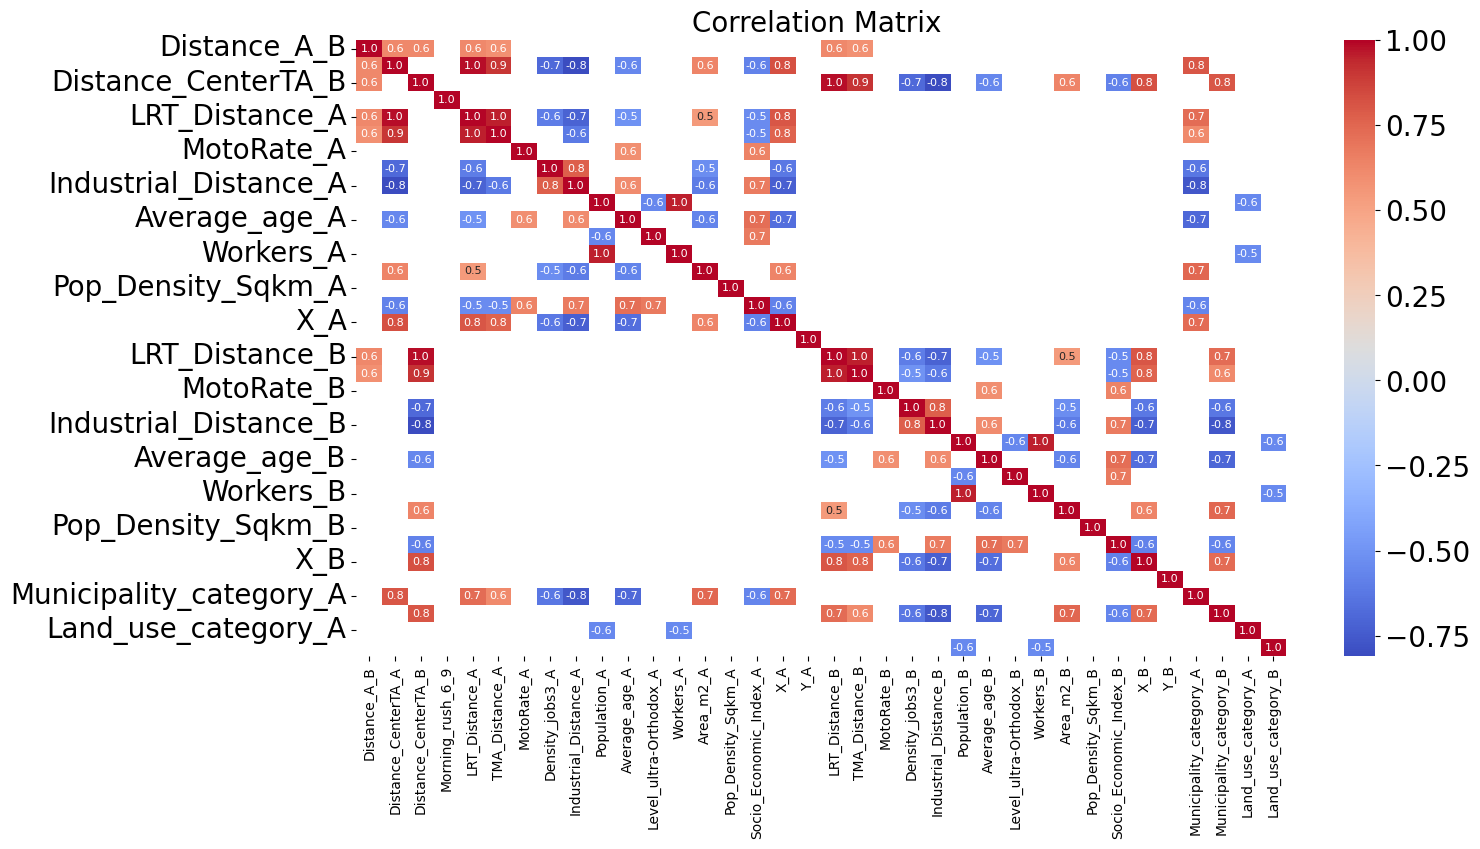

In [ ]:
corr_matrix_03 = corr_matrix[(corr_matrix > 0.5)|(corr_matrix <= - 0.5)]

# Plot correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix_03, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 8})

plt.title('Correlation Matrix ')
# Set  font size for all elements of the plot
plt.rc('font', size=10) # Default text size
plt.rc('axes', titlesize=10) # Title size
plt.rc('axes', labelsize= 10) # Size of x and y axis labels
plt.rc('ytick', labelsize=10) # Size of tick marks along the y axis
plt.rc('legend', fontsize=10) # Legend font size
plt.show()

## **Brief conclusion from Exploratory Data Analysis (EDA)**:
1. The distance between feature zones A and B (Distance_A_B), the distance between the zone to the nearest train  (LRT_Distance_A, LRT_Distance_B) and busy bus lines (TMA_Distance_A, TMA_Distance_B) correlate very well with each other.
2. A very interesting Correlation. The more cars per 1000 inhabitants (MotoRate_A, MotoRate_B) the distance to the nearest train (LRT_Distance_A, LRT_Distance_B) decreases and the distance to busy bus lines (TMA_Distance_A, TMA_Distance_B) lines decreases. This is due to the fact that on the periphery of Israel there are not many cars and it is far from train stops.
3. Not surprisingly, the larger the population living in a zone (Population_A, Population_B), the more workers there are in the zone (Workers_A, Workers_B).
4. The fewer ultra-Orthodox (more Socio_Economic_Index_A, Socio_Economic_Index_B) in a zone, the smaller the population in the zone (Population_A, Population_B). Ultra Orthodox live very compactly due to the large number of children in families.
5. Municipalities with more traffic (small index Municipality_category_A, Municipality_category_B) have a higher level of cars per 1000 people (MotoRate_A, MotoRate_B).

###  3.1 Automated Exploratory Data Analysis (EDA) - sweetviz

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 48.2 MB/s eta 0:00:00


In [ ]:
# importing sweetviz
import sweetviz as sv

#analyzing the dataset
# analyze_report = sv.analyze(df_ML_model)

#display the report
# analyze_report.show_html('Sweetviz_analyze_report_data0.html')

### Saving the final date frame to a *.pkl file for part 3 of the project

In [ ]:
### Let's save the final Date frame for further launch in Machine Learning Models (part 3 of the project).

In [ ]:
# All full dataset
df_ML_model.to_pickle("df_ML_model.pkl")
df_ML_model

,fromZone,ToZone,Distance_A_B,Distance_CenterTA_A,Distance_CenterTA_B,Morning_rush_6_9,LRT_Distance_A,TMA_Distance_A,MotoRate_A,Density_jobs3_A,...,Workers_B,Area_m2_B,Pop_Density_Sqkm_B,Socio_Economic_Index_B,X_B,Y_B,Municipality_category_A,Municipality_category_B,Land_use_category_A,Land_use_category_B
18,100208,100117,4788,8941,4650,1.516901,5.163892,0.275311,458.308764,5416.474724,...,8851.0,805515.0,26.228022,2.0,184941.811962,664646.935005,2,8,1,1
20,100045,100800,18042,3205,18056,0.044563,0.000000,0.000000,322.388791,9867.151927,...,444.0,3193934.0,3650.210286,4.0,193658.055145,653125.165729,0,20,3,1
23,100158,100220,13463,6217,11310,0.672427,0.000000,0.000000,444.006914,2926.926738,...,10954.0,1589708.0,60.227619,7.0,191622.757915,664530.825019,3,2,1,1
28,100073,100178,4343,7328,11615,3.365450,351.736275,0.000000,398.403179,1349.264949,...,5743.0,5180264.0,469.609646,9.0,189811.209984,672042.111923,21,16,16,1
30,100477,100165,16459,24732,8282,2.071278,12942.972871,6160.072619,463.934236,319.169435,...,4639.0,624521.0,72.915470,7.0,177972.712841,657381.175210,23,3,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506442,100647,101264,29948,28578,3360,2.114342,15378.906034,12350.218864,294.263156,273.883902,...,0.0,527342.0,0.000000,8.0,177558.461104,663431.547704,50,0,1,58
1506457,100335,100019,17702,23039,6351,1.302417,13100.403544,9626.028852,517.000000,16160.962677,...,5701.0,975613.0,88.926534,8.0,184861.480584,669778.657419,6,0,2,1
1506465,100274,100208,21489,18771,8941,0.114975,7760.879470,0.000000,511.990463,6212.264501,...,2332.0,359140.0,76.299129,7.0,189126.111036,666976.022247,7,2,38,1
1506470,100117,100348,23877,4650,27338,1.736168,347.142694,236.862662,300.126113,5529.990483,...,6504.0,4656287.0,323.039198,9.0,199040.221150,645375.522273,8,17,1,6


In [ ]:
# Intercity dataset
df_intercity_ML_model = df_ML_model[df_ML_model['Municipality_category_A'] != df_ML_model['Municipality_category_B']]
df_intercity_ML_model.to_pickle("df_intercity_ML_model.pkl")
df_intercity_ML_model

,fromZone,ToZone,Distance_A_B,Distance_CenterTA_A,Distance_CenterTA_B,Morning_rush_6_9,LRT_Distance_A,TMA_Distance_A,MotoRate_A,Density_jobs3_A,...,Workers_B,Area_m2_B,Pop_Density_Sqkm_B,Socio_Economic_Index_B,X_B,Y_B,Municipality_category_A,Municipality_category_B,Land_use_category_A,Land_use_category_B
18,100208,100117,4788,8941,4650,1.516901,5.163892,0.275311,458.308764,5416.474724,...,8851.0,805515.0,26.228022,2.0,184941.811962,664646.935005,2,8,1,1
20,100045,100800,18042,3205,18056,0.044563,0.000000,0.000000,322.388791,9867.151927,...,444.0,3193934.0,3650.210286,4.0,193658.055145,653125.165729,0,20,3,1
23,100158,100220,13463,6217,11310,0.672427,0.000000,0.000000,444.006914,2926.926738,...,10954.0,1589708.0,60.227619,7.0,191622.757915,664530.825019,3,2,1,1
28,100073,100178,4343,7328,11615,3.365450,351.736275,0.000000,398.403179,1349.264949,...,5743.0,5180264.0,469.609646,9.0,189811.209984,672042.111923,21,16,16,1
30,100477,100165,16459,24732,8282,2.071278,12942.972871,6160.072619,463.934236,319.169435,...,4639.0,624521.0,72.915470,7.0,177972.712841,657381.175210,23,3,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506442,100647,101264,29948,28578,3360,2.114342,15378.906034,12350.218864,294.263156,273.883902,...,0.0,527342.0,0.000000,8.0,177558.461104,663431.547704,50,0,1,58
1506457,100335,100019,17702,23039,6351,1.302417,13100.403544,9626.028852,517.000000,16160.962677,...,5701.0,975613.0,88.926534,8.0,184861.480584,669778.657419,6,0,2,1
1506465,100274,100208,21489,18771,8941,0.114975,7760.879470,0.000000,511.990463,6212.264501,...,2332.0,359140.0,76.299129,7.0,189126.111036,666976.022247,7,2,38,1
1506470,100117,100348,23877,4650,27338,1.736168,347.142694,236.862662,300.126113,5529.990483,...,6504.0,4656287.0,323.039198,9.0,199040.221150,645375.522273,8,17,1,6


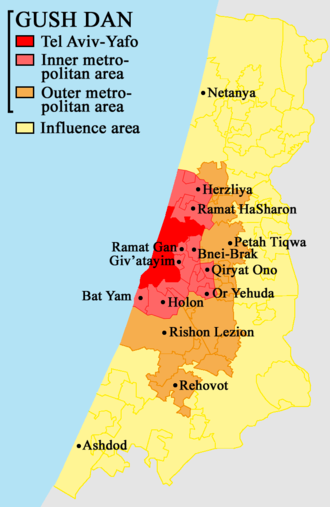

In [ ]:
# TA Metropolin (GUSH-DAN) dataset
from IPython.display import Image


image_path = path + "/Data/Gush_Dan.png"
Image(filename=image_path)

In [ ]:
# TA Metropolin dataset - radius 45 km

df_GushDan_ML_model = df_ML_model[(df_ML_model['Distance_CenterTA_A'] <= 45000) & (df_ML_model['Distance_CenterTA_B'] <= 45000)]
df_GushDan_ML_model.to_pickle("df_GushDan_ML_model.pkl")
df_GushDan_ML_model

,fromZone,ToZone,Distance_A_B,Distance_CenterTA_A,Distance_CenterTA_B,Morning_rush_6_9,LRT_Distance_A,TMA_Distance_A,MotoRate_A,Density_jobs3_A,...,Workers_B,Area_m2_B,Pop_Density_Sqkm_B,Socio_Economic_Index_B,X_B,Y_B,Municipality_category_A,Municipality_category_B,Land_use_category_A,Land_use_category_B
18,100208,100117,4788,8941,4650,1.516901,5.163892,0.275311,458.308764,5416.474724,...,8851.0,805515.0,26.228022,2.0,184941.811962,664646.935005,2,8,1,1
20,100045,100800,18042,3205,18056,0.044563,0.000000,0.000000,322.388791,9867.151927,...,444.0,3193934.0,3650.210286,4.0,193658.055145,653125.165729,0,20,3,1
23,100158,100220,13463,6217,11310,0.672427,0.000000,0.000000,444.006914,2926.926738,...,10954.0,1589708.0,60.227619,7.0,191622.757915,664530.825019,3,2,1,1
28,100073,100178,4343,7328,11615,3.365450,351.736275,0.000000,398.403179,1349.264949,...,5743.0,5180264.0,469.609646,9.0,189811.209984,672042.111923,21,16,16,1
30,100477,100165,16459,24732,8282,2.071278,12942.972871,6160.072619,463.934236,319.169435,...,4639.0,624521.0,72.915470,7.0,177972.712841,657381.175210,23,3,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506442,100647,101264,29948,28578,3360,2.114342,15378.906034,12350.218864,294.263156,273.883902,...,0.0,527342.0,0.000000,8.0,177558.461104,663431.547704,50,0,1,58
1506457,100335,100019,17702,23039,6351,1.302417,13100.403544,9626.028852,517.000000,16160.962677,...,5701.0,975613.0,88.926534,8.0,184861.480584,669778.657419,6,0,2,1
1506465,100274,100208,21489,18771,8941,0.114975,7760.879470,0.000000,511.990463,6212.264501,...,2332.0,359140.0,76.299129,7.0,189126.111036,666976.022247,7,2,38,1
1506470,100117,100348,23877,4650,27338,1.736168,347.142694,236.862662,300.126113,5529.990483,...,6504.0,4656287.0,323.039198,9.0,199040.221150,645375.522273,8,17,1,6


In [ ]:
# TA Metropolin dataset - radius 30 km

df_GushDan_ML_model = df_ML_model[(df_ML_model['Distance_CenterTA_A'] <= 30000) & (df_ML_model['Distance_CenterTA_B'] <= 30000)]
df_GushDan_ML_model.to_pickle("df_GushDan30km_ML_model.pkl")
df_GushDan_ML_model

,fromZone,ToZone,Distance_A_B,Distance_CenterTA_A,Distance_CenterTA_B,Morning_rush_6_9,LRT_Distance_A,TMA_Distance_A,MotoRate_A,Density_jobs3_A,...,Workers_B,Area_m2_B,Pop_Density_Sqkm_B,Socio_Economic_Index_B,X_B,Y_B,Municipality_category_A,Municipality_category_B,Land_use_category_A,Land_use_category_B
18,100208,100117,4788,8941,4650,1.516901,5.163892,0.275311,458.308764,5416.474724,...,8851.0,805515.0,26.228022,2.0,184941.811962,664646.935005,2,8,1,1
20,100045,100800,18042,3205,18056,0.044563,0.000000,0.000000,322.388791,9867.151927,...,444.0,3193934.0,3650.210286,4.0,193658.055145,653125.165729,0,20,3,1
23,100158,100220,13463,6217,11310,0.672427,0.000000,0.000000,444.006914,2926.926738,...,10954.0,1589708.0,60.227619,7.0,191622.757915,664530.825019,3,2,1,1
28,100073,100178,4343,7328,11615,3.365450,351.736275,0.000000,398.403179,1349.264949,...,5743.0,5180264.0,469.609646,9.0,189811.209984,672042.111923,21,16,16,1
30,100477,100165,16459,24732,8282,2.071278,12942.972871,6160.072619,463.934236,319.169435,...,4639.0,624521.0,72.915470,7.0,177972.712841,657381.175210,23,3,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506442,100647,101264,29948,28578,3360,2.114342,15378.906034,12350.218864,294.263156,273.883902,...,0.0,527342.0,0.000000,8.0,177558.461104,663431.547704,50,0,1,58
1506457,100335,100019,17702,23039,6351,1.302417,13100.403544,9626.028852,517.000000,16160.962677,...,5701.0,975613.0,88.926534,8.0,184861.480584,669778.657419,6,0,2,1
1506465,100274,100208,21489,18771,8941,0.114975,7760.879470,0.000000,511.990463,6212.264501,...,2332.0,359140.0,76.299129,7.0,189126.111036,666976.022247,7,2,38,1
1506470,100117,100348,23877,4650,27338,1.736168,347.142694,236.862662,300.126113,5529.990483,...,6504.0,4656287.0,323.039198,9.0,199040.221150,645375.522273,8,17,1,6


In [ ]:
# TA Metropolin dataset - radius 20 km

df_GushDan_ML_model = df_ML_model[(df_ML_model['Distance_CenterTA_A'] <= 20000) & (df_ML_model['Distance_CenterTA_B'] <= 20000)]
df_GushDan_ML_model.to_pickle("df_GushDan20km_ML_model.pkl")
df_GushDan_ML_model

,fromZone,ToZone,Distance_A_B,Distance_CenterTA_A,Distance_CenterTA_B,Morning_rush_6_9,LRT_Distance_A,TMA_Distance_A,MotoRate_A,Density_jobs3_A,...,Workers_B,Area_m2_B,Pop_Density_Sqkm_B,Socio_Economic_Index_B,X_B,Y_B,Municipality_category_A,Municipality_category_B,Land_use_category_A,Land_use_category_B
18,100208,100117,4788,8941,4650,1.516901,5.163892,0.275311,458.308764,5416.474724,...,8851.0,805515.0,26.228022,2.0,184941.811962,664646.935005,2,8,1,1
20,100045,100800,18042,3205,18056,0.044563,0.000000,0.000000,322.388791,9867.151927,...,444.0,3193934.0,3650.210286,4.0,193658.055145,653125.165729,0,20,4,1
23,100158,100220,13463,6217,11310,0.672427,0.000000,0.000000,444.006914,2926.926738,...,10954.0,1589708.0,60.227619,7.0,191622.757915,664530.825019,3,2,1,1
28,100073,100178,4343,7328,11615,3.365450,351.736275,0.000000,398.403179,1349.264949,...,5743.0,5180264.0,469.609646,9.0,189811.209984,672042.111923,21,16,19,1
32,100465,100053,7966,8393,4725,0.000000,1454.689622,0.000000,479.978514,1067.998347,...,0.0,787711.0,0.000000,8.0,181687.869952,660788.551858,2,0,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506413,100006,100105,9324,2270,7375,0.456383,58.103095,0.000000,584.995160,1743.954449,...,2284.0,3226730.0,662.029134,5.0,185130.812609,659710.441082,0,26,1,1
1506419,100265,100423,21055,12377,13803,1.209891,2045.991158,0.000000,520.881902,2790.754868,...,1574.0,12439097.0,4061.082925,5.0,192720.149908,671423.410442,1,13,1,1
1506427,100250,100053,7845,11136,4725,0.000000,20.277410,0.000000,556.992120,937.725258,...,0.0,787711.0,0.000000,8.0,181687.869952,660788.551858,1,0,56,21
1506465,100274,100208,21489,18771,8941,0.114975,7760.879470,0.000000,511.990463,6212.264501,...,2332.0,359140.0,76.299129,7.0,189126.111036,666976.022247,7,2,27,1


In [ ]:
df_ML_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222570 entries, 18 to 1506474
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   fromZone                 222570 non-null  int64  
 1   ToZone                   222570 non-null  int64  
 2   Distance_A_B             222570 non-null  int64  
 3   Distance_CenterTA_A      222570 non-null  int64  
 4   Distance_CenterTA_B      222570 non-null  int64  
 5   Morning_rush_6_9         222570 non-null  float64
 6   LRT_Distance_A           222570 non-null  float64
 7   TMA_Distance_A           222570 non-null  float64
 8   MotoRate_A               222570 non-null  float64
 9   Density_jobs3_A          222570 non-null  float64
 10  Industrial_Distance_A    222570 non-null  float64
 11  Population_A             222570 non-null  float64
 12  Average_age_A            222570 non-null  float64
 13  Level_ultra-Orthodox_A   222570 non-null  float64
 14  Workers